# Thesis Plots

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.ndimage import imread
from scipy.stats import linregress
from glob import glob
import numpy as np
import json
import liborigin
import os

## Initialisation Stuff

In [9]:
plt.rc('text', usetex=True)
plt.rc('font', family='monospace')
plt.rcParams.update({"font.size": 22})
plt.rcParams.update({"axes.grid": True})
plt.rcParams.update({"text.latex.preamble":["\\usepackage{braket}"]})
plt.rc("figure", figsize=(10, 6))

In [10]:
notebook_dir = "/home/jimmy/Dropbox/PhDWork/Thesis/"
def plotDataDirectory(name):
    plotDir = notebook_dir + "Figures/"+name+"/PlotData/"
    ipy = get_ipython()
    ipy.magic("cd "+plotDir)

In [4]:
def inRange(dataFrame,col,valRange=(0,1)):
    return dataFrame.loc[(dataFrame[col] >= min(valRange)) & (dataFrame[col] <=max(valRange))]

In [5]:
def propagateProbErr(data,n2_col,n12_col,b2_col,b12_col):
    errs = data

## Chapter 1

## Chapter 2

## Chapter 3

## Chapter 4

In [8]:
plotDataDirectory("Chapter4")

/media/Storage/Dropbox/PhDWork/Thesis/Figures/Chapter4/PlotData


### 2D Magnetic Field

In [235]:
tuples = linspace(-10,10,201)
index = pd.MultiIndex.from_product([tuples,tuples], names=['first', 'second'])
mot2Dgrad = pd.read_csv("2D_1A_field_grad.csv",names=["bx","by","bz"])
mot2Dgrad = mot2Dgrad.set_index(linspace(-10,10,401))
mot2Dxy = pd.read_csv("2D_1A_xy_field.csv",sep="\t",names=["bx","by","bz"],header=None).set_index(index)
mot2Dxz = pd.read_csv("2D_1A_xz_field.csv",sep="\t",names=["bx","by","bz"],header=None).set_index(index)

In [6]:
def field_vector_plot(df,x_label,y_label,name):
    # Contour Plot
    Y, X = np.mgrid[-10:10:201j, -10:10:201j]
    Z = np.sqrt(df["bx"]**2+df["by"]**2+df["bz"]**2).values.reshape((201,201))
    cp = plt.contourf(X, Y, Z)
    cb = plt.colorbar(cp)

    # Vector Field
#     X, Y = np.mgrid[-10:10:21j, -10:10:21j]
    i=pd.MultiIndex.from_arrays([X[0,:],Y[0,:]])
    vals=df.loc[i]
    U =df[x_label].values.reshape((201,201))
    V = df[y_label].values.reshape((201,201))
    speed = np.sqrt(U**2+V**2)
    plt.streamplot(X,Y,V/speed,U/speed,color="black")

    plt.xlabel(x_label[1:]+" (mm)")
    plt.ylabel(y_label[1:]+" (mm)")
    plt.tight_layout()
    plt.savefig(name)
    plt.show()


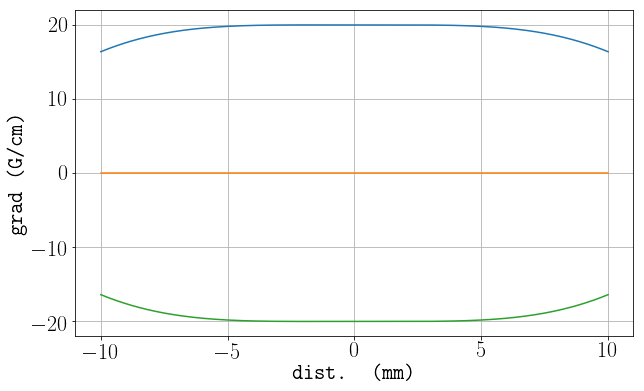

In [236]:
mot2Dgrad.plot(legend=None)
plt.xlabel("dist. (mm)")
plt.ylabel("grad (G/cm)")
plt.savefig("../2D_grad.pdf")

In [112]:
mot2Dxy.iloc[1,1]

1.6158648327510376

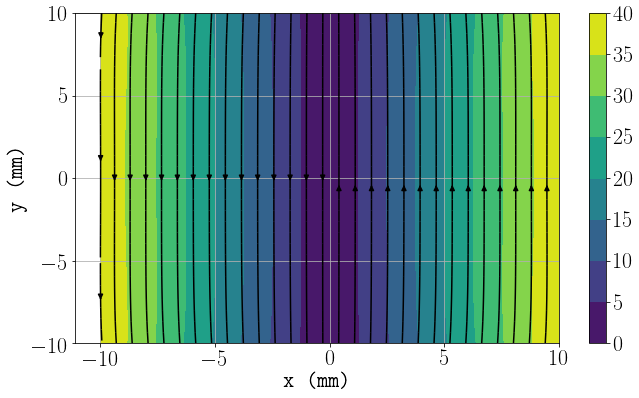

In [260]:
field_vector_plot(mot2Dxy,"bx","by","../2D_field_xy.pdf")

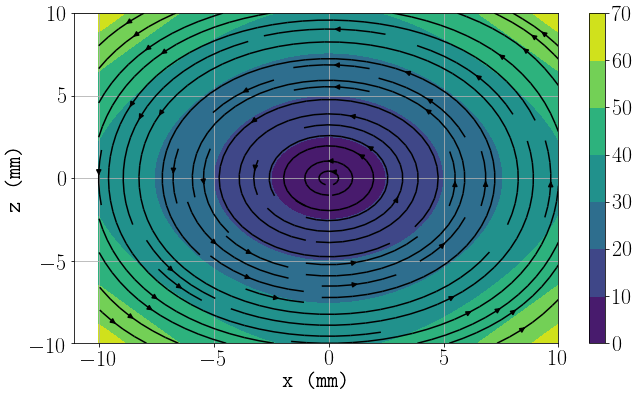

In [261]:
field_vector_plot(mot2Dxz,"bx","bz","../2D_field_xz.pdf")

### 3D Magnetic Field

In [109]:
tuples = linspace(-10,10,201)
index = pd.MultiIndex.from_product([tuples,tuples], names=['first', 'second'])
mot3Dgrad = pd.read_csv("3D_2.5A_field_grad.csv",names=["bx","by","bz"])
mot3Dgrad = mot3Dgrad.set_index(linspace(-10,10,401))
mot3Dxy = pd.read_csv("3D_2.5A_xy_field.csv",sep="\t",names=["bx","by","bz"],header=None).set_index(index)
mot3Dxz = pd.read_csv("3D_2.5A_xz_field.csv",sep="\t",names=["bx","by","bz"],header=None).set_index(index)

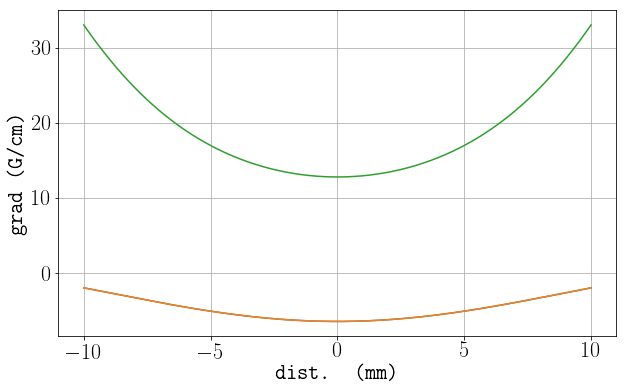

In [110]:
mot3Dgrad.plot(legend=None)
plt.xlabel("dist. (mm)")
plt.ylabel("grad (G/cm)")
plt.savefig("../3D_grad.pdf")

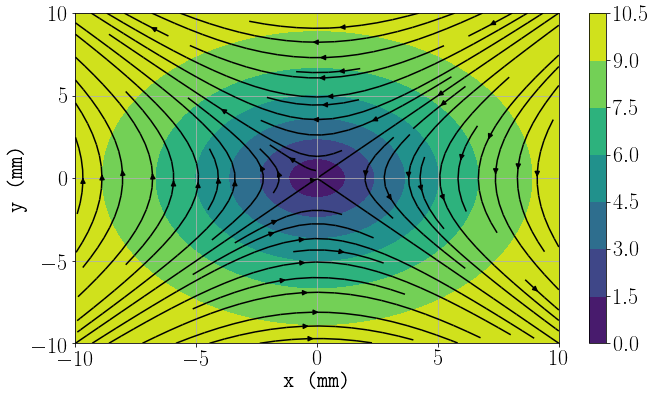

In [117]:
field_vector_plot(mot3Dxy,"bx","by","../3D_field_xy.pdf")

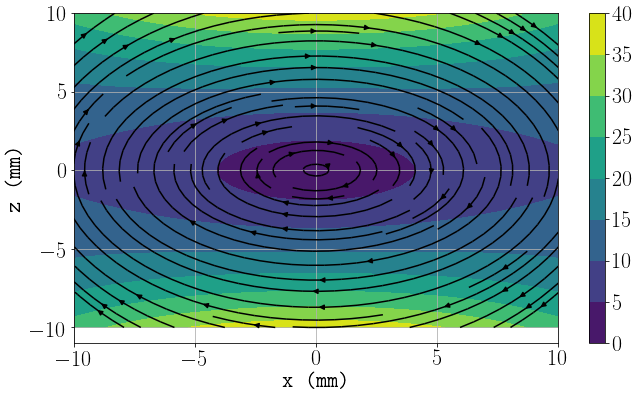

In [116]:
field_vector_plot(mot3Dxz,"bx","bz","../3D_field_xz.pdf")

In [7]:
coilData = pd.read_csv("mot_coils_3D.csv",names=["dist","best","mid","worst"],header=None)
coilSim = pd.read_csv("3D_field_calc.csv",header=None,sep="\t")


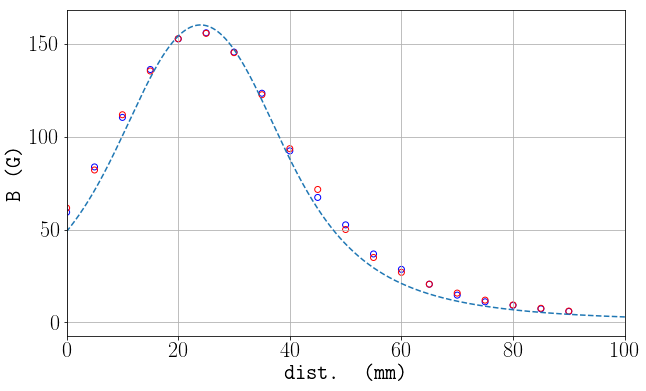

In [8]:
ax=plt.scatter(coilData["dist"].values*10,coilData["best"].values,marker="o",facecolor="none",edgecolors="b")
plt.scatter(coilData["dist"].values*10,coilData["mid"].values,marker="o",facecolor="none",edgecolors="r")
coilSim["x"] = -1*coilSim[0]+70
coilSim["y"] = 1e4*coilSim[1]
coilSim.plot(x="x",y="y",ax=plt.gca(),linestyle="--",legend=None)
plt.xlim(0,100);
plt.xlabel("dist. (mm)")
plt.ylabel("B (G)")
plt.savefig("../mot_field_3D.pdf")

To calculate the field from two coils in anti-helmholtz, I'll take the field measured from the second coil, displace it by a given distance and invert it. We know that there is a separation of 3.5cm from each coil - i.e. 7 units of 0.5cm

In [119]:
off = 20
dist = len(coilData["mid"].values)*2+off-10
print(dist)
arr = np.zeros(dist)
arr2 = np.zeros(dist)
arr[off:off+len(coilData["mid"].values)] = -1.0*np.flip(coilData["mid"].values,0)
arr2[:len(coilData["best"])] = coilData["best"].values
arr+=arr2

48


In [120]:
f=interp1d(array(range(0,dist))*0.5,arr,"cubic")

In [56]:
arange(0,50*0.5,0.5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5])

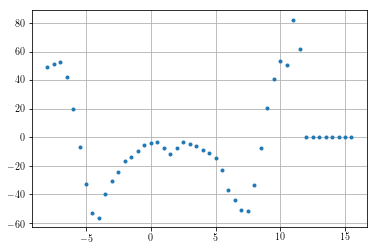

In [121]:
plot(array(range(0,dist))*0.5-8,2*gradient(f(arange(0,dist*0.5,0.5))),".")

### Camera Calibration

In [282]:
mvUP = pd.read_csv("pikecalib/ctrlVvsPower.csv",names=["mv","uW"],header=None,skiprows=1)
exposure_times = array([66, 100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 800])
exposureData = [(imread(f"pikecalib/0mV_{x}us.png","L")-imread(f"pikecalib/0mV_{x}us_dark.png","L"))[750 :1100,1100:1450] for x in exposure_times]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [283]:
counts = [sum(sum(x)) for x in exposureData]

In [284]:
exp_line=linregress(exposure_times,counts)

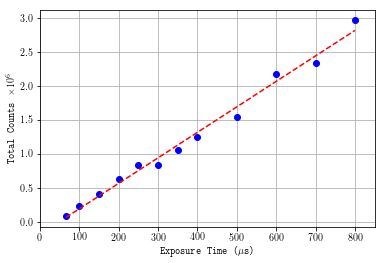

In [285]:
plot(exposure_times,1e-6*array(counts),"bo",)
plot(exposure_times,1e-6*(exp_line.slope*array(exposure_times)+exp_line.intercept),"r--")
plt.xlabel(r"Exposure Time ($\mu$s)");
plt.ylabel(r"Total Counts $\times 10^{6}$")
plt.xlim(0,850)
plt.savefig("../cam_per_exposure.pdf")

In [278]:
powerData = [(imread(f"pikecalib/{x}mV_100us.png","L")-imread(f"pikecalib/0mV_100us_dark.png","L"))[750:1100, 1100 :1450] for x in mvUP["mv"][0:7]]
powerCounts = [sum(sum(x)) for x in powerData]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


In [279]:
power_line=linregress(mvUP["uW"].values[0:7],powerCounts)

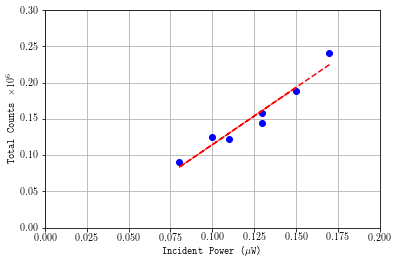

In [280]:
plot(mvUP["uW"].values[0:7],array(powerCounts)*1e-6,"bo",)
plot(mvUP["uW"].values[0:7],1e-6*(power_line.slope*array(mvUP["uW"].values[0:7])+power_line.intercept),"r--")
plt.xlabel(r"Incident Power ($\mu$W)");
plt.ylabel(r"Total Counts $\times 10^{6}$")
plt.xlim(0,0.2)
plt.ylim(0,0.3)
plt.savefig("../cam_per_power.pdf")

In [286]:
power_line

LinregressResult(slope=1578029.230769231, intercept=-43358.06823489015, rvalue=0.9722976175595366, pvalue=0.00024169675354068676, stderr=169658.49306809824)

In [287]:
exp_line

LinregressResult(slope=3748.097717177648, intercept=-178429.83492137445, rvalue=0.9940645148512891, pvalue=5.744213387509633e-11, stderr=129.71614925612158)

In [288]:
exp_line.slope/0.17

22047.633630456752

In [289]:
power_line.slope/100

15780.29230769231

In [290]:
3568/0.17

20988.235294117647

### Muquans Plots

#### Sat Spec
This is the plot of the saturated absorption spectrum taken from the Muquans laser. The X-axis is rescaled into a detuning from the 3,4 crossover in MHz

In [136]:
satData = pd.read_csv("satspec.csv",names=["X","Y"])
satData["X"] = (satData["X"] - 384.2291813694837)*1e6
satData["Y"] += 1.14
satData["X"] = satData[satData["X"]<600]

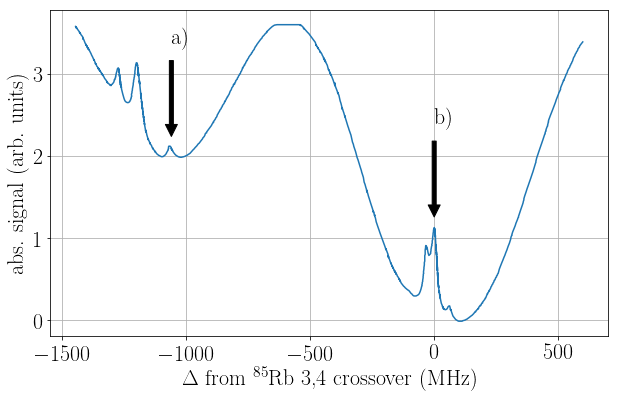

In [140]:
plot(satData["X"],satData["Y"])
plt.xlabel(r"$\Delta$ from $^{85}$Rb 3,4 crossover (MHz)")
plt.ylabel("abs. signal (arb. units)")
plt.annotate("a)",xy=(-1060,2.119207),xytext=(-1060,2.119207+1.25), arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate("b)",xy=(0,1.14),xytext=(0,2.39), arrowprops=dict(facecolor='black', shrink=0.1))
plt.savefig("../sat_spec.pdf")
plt.show()

In [110]:
inRange(satData,"X",(-1100,-1050)).max()

X   -1051.639067
Y       2.119207
dtype: float64

#### Error Signal

In [38]:
errorData = pd.read_csv("error_signal.csv",names=["X","Y"])
errorData["X"]+=2

In [22]:
len(errorData)

864

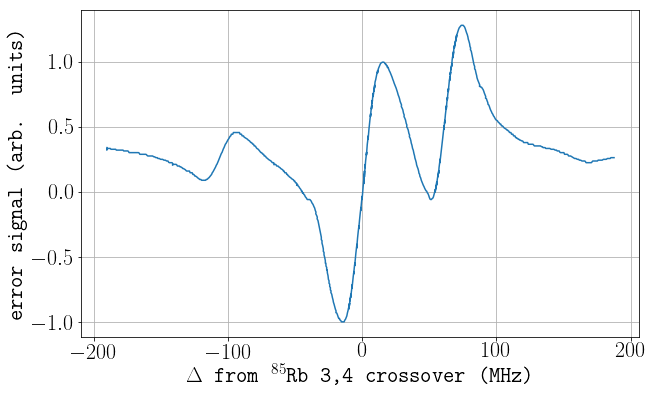

In [40]:
plt.plot(errorData["X"],errorData["Y"])
plt.xlabel(r"$\Delta$ from $^{85}$Rb 3,4 crossover (MHz)")
plt.ylabel("error signal (arb. units)")
plt.savefig("../error_signal.pdf")

In [25]:
inRange(errorData,"Y",(-0.005,0.005))

,X,Y
293,-47.304421,0.004045
294,-46.804117,0.004045
547,46.002228,0.004045
559,52.005873,-0.002401
561,52.381101,-0.002401


#### Slave 0 error signal

In [34]:
slave0error = pd.read_csv("slave0_error.csv",header=None, names=["x","y"])
slave0error["x_rescale"] = slave0error["x"]*400/(slave0error["x"].iloc[-1])

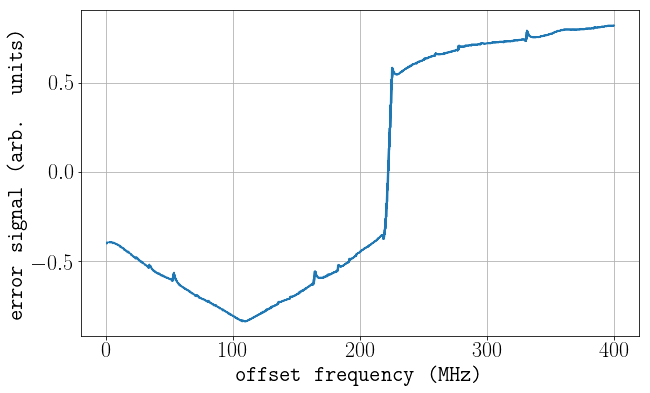

In [46]:
slave0error.plot(x="x_rescale",y="y", legend=None)
plt.xlabel("offset frequency (MHz)")
plt.ylabel("error signal (arb. units)")
plt.savefig("../slave0_error.pdf")

(215, 230)

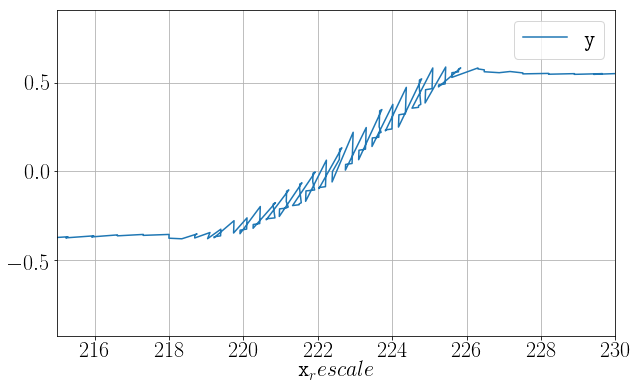

In [44]:
slave0error.plot(x="x_rescale",y="y")
plt.xlim(215,230)

### 2D MOT characterisation

#### Loading Rate vs. DIspenser Current

In [5]:
def loading(series,x):
    return series["ntot"](1-np.exp(-1.0*x/series["tau"]))

In [10]:
finePush = pd.read_csv("pushFiles_Fit.csv")
fineNoPush = pd.read_csv("noPushFiles_Fit.csv")

In [6]:
def load_json_data(filename):
    data = json.load(open(filename))
    return {k:pd.DataFrame(data[k]).sort_values("x") for k in data.keys()}

In [12]:
finePushData= load_json_data("pushFiles_Data.json")
fineNoPushData = load_json_data("noPushFiles_Data.json")

In [13]:
list(df.keys())[0::2]

NameError: name 'df' is not defined

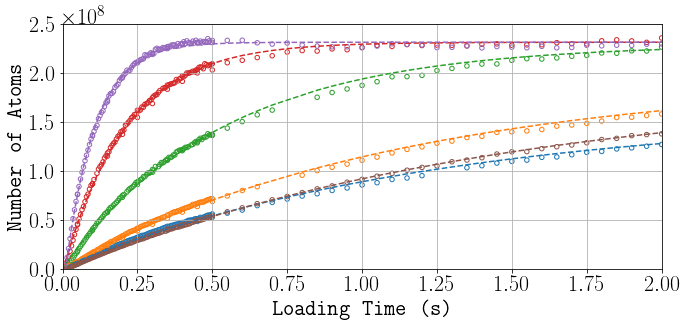

In [14]:
df = finePushData
plt.figure(figsize=(10,5))
ax = plt.gca()
colours = [(0,0,1*i/len(df)) for i in range(len(df))]
i=0
for d in list(df.keys())[0::2]:
    ax.scatter(df[d]["x"],df[d]["y"],marker="o",facecolor="none",edgecolors="C"+str(int(i/2)),s=20,alpha=1)
    ax.plot(df[d]["x"],df[d]["y_fit"],color="C"+str(int(i/2)),linestyle="dashed")
    i+=2
plt.xlim(0,2);
plt.ylim(0,2.5e8)
plt.xlabel("Loading Time (s)")
plt.ylabel("Number of Atoms")
plt.tight_layout()
plt.savefig("../loading_push.pdf")

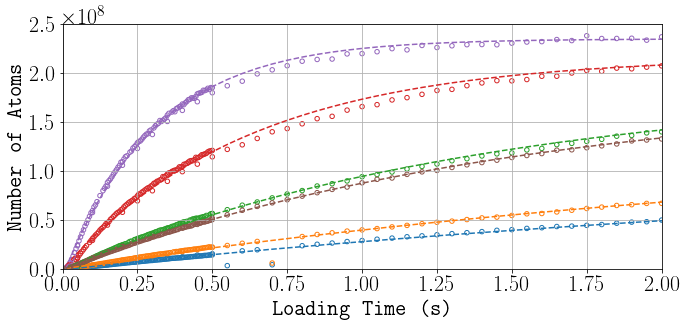

In [15]:
df = fineNoPushData
plt.figure(figsize=(10,5))
ax = plt.gca()
colours = [(0,0,1*i/len(df)) for i in range(len(df))]
i=0
for d in list(df.keys())[0::2]:
    ax.scatter(df[d]["x"],df[d]["y"],marker="o",facecolor="none",edgecolors="C"+str(int(i/2)),s=20,alpha=1)
    ax.plot(df[d]["x"],df[d]["y_fit"],color="C"+str(int(i/2)),linestyle="dashed")
    i+=2
plt.xlim(0,2);
plt.ylim(0,2.5e8)
plt.xlabel("Loading Time (s)")
plt.ylabel("Number of Atoms")
plt.tight_layout()
plt.savefig("../loading_nopush.pdf")

In [50]:
fineNoPushData["2."]

,x,y,y_fit
59,0.010,5.211505e+05,-1.227573e+04
60,0.015,5.672452e+05,1.528980e+05
61,0.020,6.324594e+05,3.178268e+05
62,0.025,6.862264e+05,4.825111e+05
63,0.030,7.979458e+05,6.469514e+05
64,0.035,9.085053e+05,8.111478e+05
65,0.040,1.016896e+06,9.751009e+05
66,0.045,1.175367e+06,1.138811e+06
67,0.050,1.322672e+06,1.302278e+06
0,0.050,1.374927e+06,1.302278e+06


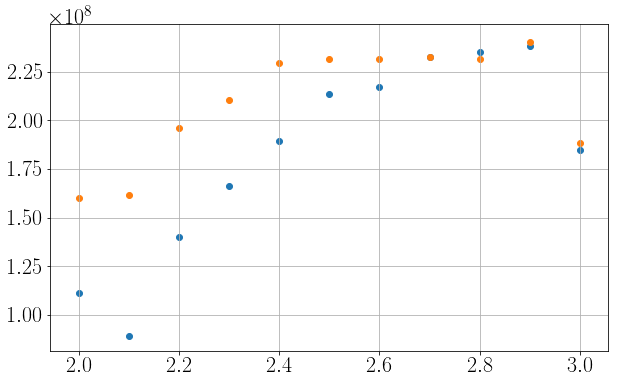

In [14]:
plt.figure()
ax=plt.gca()
ax.scatter(x=fineNoPush["Current"],y=fineNoPush["NTot"])
ax.scatter(x=finePush["Current"],y=finePush["NTot"])

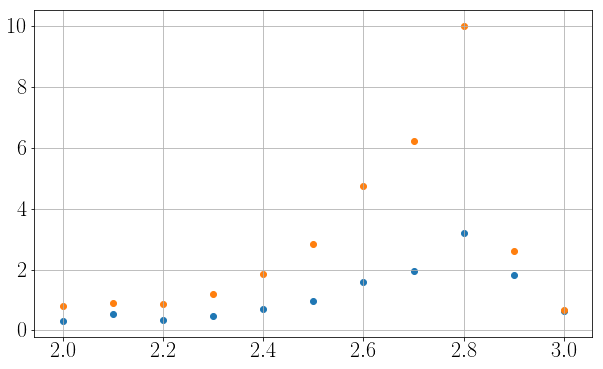

In [15]:
plt.figure()
ax=plt.gca()
ax.scatter(x=fineNoPush["Current"],y=1/fineNoPush["tau"])
ax.scatter(x=finePush["Current"],y=1/finePush["tau"])

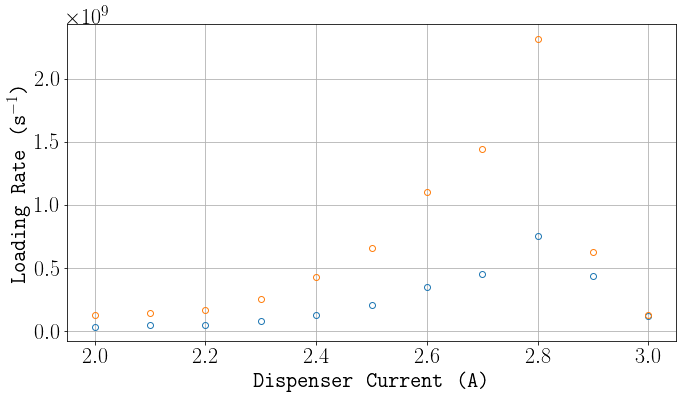

In [18]:
def plotError(df):
    x = df["Current"]
    y1 = df["NTot"]
    y2 = df["tau"]
    y1err = df["sigN"]
    y2err = df["sigtau"]
    y = y1/y2
    yerr = y*np.sqrt((y1err/y1)**2 + (y2err/y2)**2)
    ax.errorbar(x,y,None,capsize=0,linestyle="none",marker="o",mfc="none")
    
plt.figure()
ax=plt.gca()
#ax.errorbar(x=fineNoPush["Current"],y=fineNoPush["NTot"]/fineNoPush["tau"],yerr=sqrt(fineNoPush[""]))
#ax.errorbar(x=finePush["Current"],y=finePush["NTot"]/finePush["tau"])
plotError(fineNoPush)
plotError(finePush)
ax.set_xlabel("Dispenser Current (A)");
ax.set_ylabel(r"Loading Rate (s$^{-1}$)");
plt.tight_layout()
plt.savefig("../loading_rate.pdf")

### 3D MOT characterisation

## Chapter 5

In [7]:
plotDataDirectory("Chapter5")

def spread_to_df(spreadsheet,shift_A=0):
    max_pos = np.argmax(spreadsheet.columns[0].data)
    df = pd.DataFrame({x.name:x.data[0:max_pos+1] for x in spreadsheet.columns})
    df[b"A"]-=shift_A
    return df

/media/Storage/Dropbox/PhDWork/Thesis/Figures/Chapter5/PlotData


### Molasses

#### Fit example

In [13]:
fitX = pd.read_csv("image_16ms_x.csv",header=None)
fitY = pd.read_csv("image_16ms_y.csv",header=None)

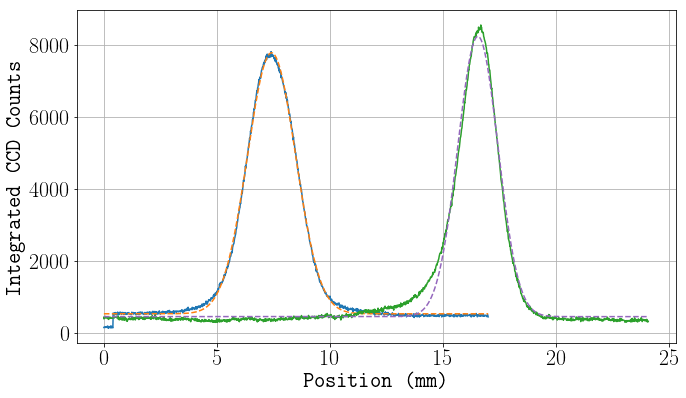

In [94]:
plt.figure()
plt.plot(fitX[0]*1e3,fitX[1])
plt.plot(fitX[0]*1e3,fitX[2],linestyle="--",color="C1",alpha=1)
plt.plot(fitY[0]*1e3,fitY[1],color="C2")
plt.plot(fitY[0]*1e3,fitY[2],linestyle="--",color="C4",alpha=1)
plt.xlabel("Position (mm)")
plt.ylabel("Integrated CCD Counts")
plt.tight_layout()
plt.savefig("../molasses_fit_examp.pdf")

#### Temperature Plot

In [14]:
tempData = pd.read_csv("molasses_temp.csv",header=None,names=["time","x","x_err","y","y_err","x_pred","y_pred"])
tempData*=1e6

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


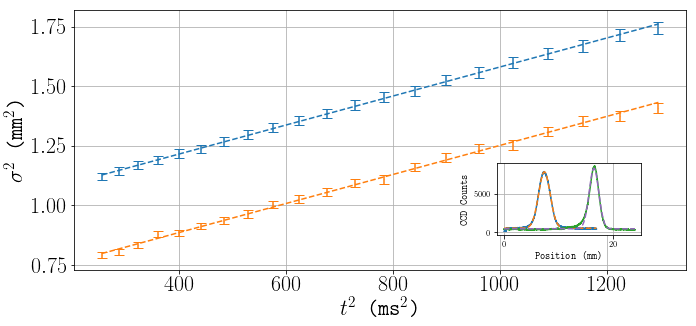

In [15]:
plt.figure(figsize=(10,5))
plt.errorbar(tempData["time"],tempData["x"],tempData["x_err"],linestyle="None",marker="o",mfc="None",ms=0.1,capsize=5)
plt.errorbar(tempData["time"],tempData["y"],tempData["y_err"],linestyle="None",marker="o",mfc="None",ms=0.1,capsize=5)
plt.plot(tempData["time"],tempData["x_pred"],linestyle="--",color="C0")
plt.plot(tempData["time"],tempData["y_pred"],linestyle="--",color="C1")
plt.xlabel(r"$t^2$ (ms$^2$)")
plt.ylabel(r"$\sigma^2$ (mm$^2$)")

a = plt.axes([.7, .3, .2, .2])
plt.plot(fitX[0]*1e3,fitX[1])
plt.plot(fitX[0]*1e3,fitX[2],linestyle="--",color="C1",alpha=1)
plt.plot(fitY[0]*1e3,fitY[1],color="C2")
plt.plot(fitY[0]*1e3,fitY[2],linestyle="--",color="C4",alpha=1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Position (mm)",fontsize=10)
plt.ylabel("CCD Counts",fontsize=10)

plt.tight_layout()
plt.savefig("../temperature_launch.pdf")

#### Launch

In [16]:
launchData = pd.read_csv("molasses_positions.csv",header=None,names=["time","x","x_err","y","y_err","x_pred","y_pred"])
launchData*=1e3

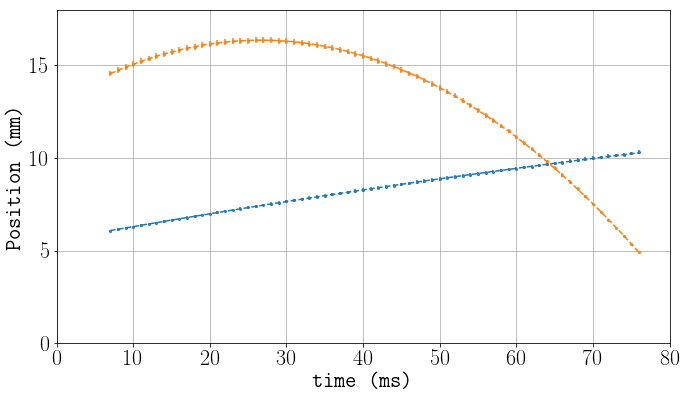

In [17]:
plt.figure()
plt.errorbar(launchData["time"],launchData["x"],launchData["x_err"],linestyle="None",marker="o",mfc="None",ms=2)
plt.errorbar(launchData["time"],launchData["y"],launchData["y_err"],linestyle="None",marker="o",mfc="None",ms=2)
plt.plot(launchData["time"],launchData["x_pred"],linestyle="--",color="C0")
plt.plot(launchData["time"],launchData["y_pred"],linestyle="--",color="C1")
plt.xlabel(r"time (ms)")
plt.ylabel(r"Position (mm)")
plt.xlim(0,80)
plt.ylim(0,18)
plt.tight_layout()
plt.savefig("../molasses_position.pdf")

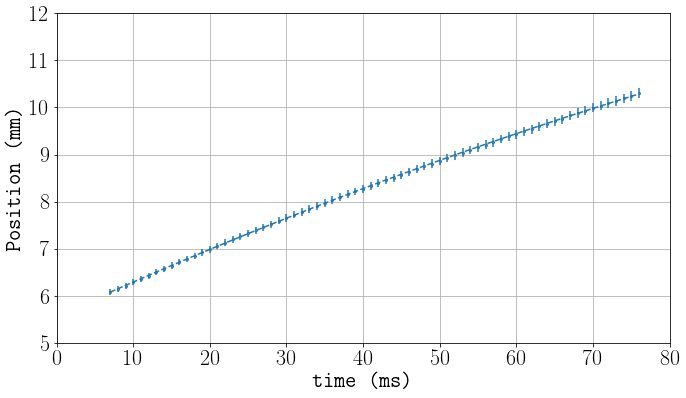

In [21]:
plt.figure()
plt.errorbar(launchData["time"],launchData["x"],launchData["x_err"],linestyle="None",marker="o",mfc="None",ms=2)
#plt.errorbar(launchData["time"],launchData["y"],launchData["y_err"],linestyle="None",marker="o",mfc="None",ms=2)
plt.plot(launchData["time"],launchData["x_pred"],linestyle="--",color="C0")
#plt.plot(launchData["time"],launchData["y_pred"],linestyle="--",color="C1")
plt.xlabel(r"time (ms)")
plt.ylabel(r"Position (mm)")
plt.xlim(0,80)
plt.ylim(5,12)
plt.tight_layout()

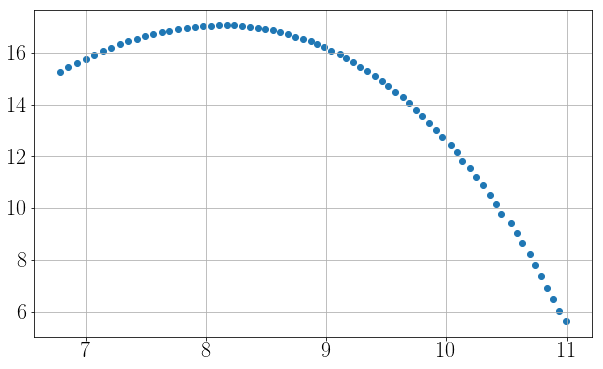

In [98]:
plt.scatter(launchData["x"],launchData["y"])

### State Preparation

#### F=2 Step 1

In [56]:
orig = liborigin.parseOriginFile("CorrectFreqF2/20170403.opj");

Origin file version: 9.31
8 0 0 6 0
Loading book #0(b'A01F2Fp2TimeS'/b'01_F2_Fp2_TimeScan_ZBias_m0p47V.dat\rZ:\\Data\\20170403\\CorrectFreqF2\\01_F2_Fp2_TimeScan_ZBias_m0p47V.dat') (1 sheets, 11 columns)
Loading book #1(b'A02F2Fp2TimeS'/b'02_F2_Fp2_TimeScan_ZBias_2p5V.dat\rZ:\\Data\\20170403\\CorrectFreqF2\\02_F2_Fp2_TimeScan_ZBias_2p5V.dat') (1 sheets, 11 columns)
Loading book #2(b'A03F2Fp2TimeS'/b'03_F2_Fp2_TimeScan_ZBias_5V.dat\rZ:\\Data\\20170403\\CorrectFreqF2\\03_F2_Fp2_TimeScan_ZBias_5V.dat') (1 sheets, 11 columns)
Loading book #-1(b'Table1'/b'') (1 sheets, 2 columns)
Loading book #5(b'A05F2Fp2F1F0m'/b'05_F2_Fp2_F1_F0_mPhiFreqScan_ZBias_5V.dat\rZ:\\Data\\20170403\\CorrectFreqF2\\05_F2_Fp2_F1_F0_mPhiFreqScan_ZBias_5V.dat') (1 sheets, 11 columns)
Loading book #7(b'A06F2Fp2F1F0m'/b'06_F2_Fp2_F1_F0_mPhiVoltScan_ZBias_5V.dat\rZ:\\Data\\20170403\\CorrectFreqF2\\06_F2_Fp2_F1_F0_mPhiVoltScan_ZBias_5V.dat') (1 sheets, 12 columns)
Loading book #11(b'A12F2prepCont'/b'12_F2prep_ContraPropSe

Each series corresponds to (-0.47 V, 5V, 9V) control voltages for the current through the Z bias coils
We know that the X axis coils give a field of 3G for 9V. It's reasonable to assume that the Z bias gives roughly the same field per current

In [115]:
np.array([-0.47,5,9])/3

array([-0.15666667,  1.66666667,  3.        ])

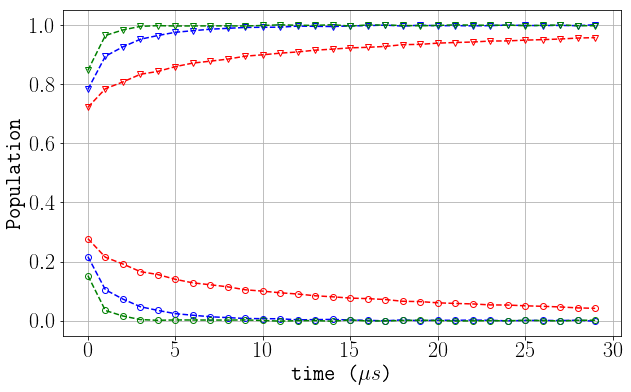

In [114]:
ax=spread_to_df(orig["spreads"][0])[b"J"].plot(legend=None,marker="o",mfc='None',linestyle="--",color="r")
spread_to_df(orig["spreads"][0])[b"K"].plot(ax=ax,legend=None,marker="v",mfc='None',linestyle="--",color="r")
spread_to_df(orig["spreads"][1])[b"J"].plot(ax=ax,legend=None,marker="o",mfc='None',linestyle="--",color="b")
spread_to_df(orig["spreads"][1])[b"K"].plot(ax=ax,legend=None,marker="v",mfc='None',linestyle="--",color="b")
spread_to_df(orig["spreads"][2])[b"J"].plot(ax=ax,legend=None,marker="o",mfc='None',linestyle="--",color="g")
spread_to_df(orig["spreads"][2])[b"K"].plot(ax=ax,legend=None,marker="v",mfc='None',linestyle="--",color="g")
plt.xlabel(r"time ($\mu s$)")
plt.ylabel("Population")
plt.savefig("../step1_pumping.pdf")

#### Step 2 F=1

In [132]:
step2 = liborigin.parseOriginFile("20170707/UNTITLED.opj")

Origin file version: 9.31
3 0 0 2 0
Loading book #0(b'MWRabiFreqSca'/b'MW_RabiFreqScan_3dBm_90us.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170707\\MW_RabiFreqScan_3dBm_90us.dat') (1 sheets, 10 columns)
Loading book #1(b'MWRabiFreqSc1'/b'MW_RabiFreqScan_6dBm_72us.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170707\\MW_RabiFreqScan_6dBm_72us.dat') (1 sheets, 10 columns)
Loading book #2(b'MWRabiFreqSc2'/b'MW_RabiFreqScan_6dBm_71us_6830275.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170707\\MW_RabiFreqScan_6dBm_71us_6830275.dat') (1 sheets, 10 columns)
Loading graph #3(b'Graph2'/b'') (1 layers, 3D: False)
Loading graph #4(b'Graph1'/b'') (1 layers, 3D: False)


In [133]:
mwDist_nof2 = [pd.read_csv(x,sep=" ",index_col=1).iloc[5:] for x in glob("20170707/*RabiFreq*Step1.dat")]
mwDist = [pd.read_csv(x,sep=" ",index_col=1).iloc[5:] for x in glob("20170707/*RabiFreq*68*.dat")]

In [134]:
step2_new = liborigin.parseOriginFile("20170717/20170717.opj")

Origin file version: 9.31
12 0 0 7 0
Loading book #0(b'A15ScanMWFreq'/b'15_ScanMWFreq68us_Mf00_Step2ON.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170717\\15_ScanMWFreq68us_Mf00_Step2ON.dat') (1 sheets, 10 columns)
Loading book #1(b'A14ScanMWFreq'/b'14_ScanMWFreq68us_Mf00_Step2OFF.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170717\\14_ScanMWFreq68us_Mf00_Step2OFF.dat') (1 sheets, 10 columns)
Loading book #2(b'A13ScanMWFreq'/b'13_ScanMWFreq68us_Mfm11_Step2ON.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170717\\13_ScanMWFreq68us_Mfm11_Step2ON.dat') (1 sheets, 10 columns)
Loading book #3(b'A12ScanMWFreq'/b'12_ScanMWFreq68us_Mfm11_Step2OFF.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170717\\12_ScanMWFreq68us_Mfm11_Step2OFF.dat') (1 sheets, 10 columns)
Loading book #5(b'A11ScanMWFreq'/b'11_ScanMWFreq68us_Mfm10_Step2ON.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170717\\11_ScanMWFreq68us_Mfm10_Step2ON.dat') (1 sheets, 10 columns)
Loading book #6(b'A10ScanMWFreq'/b'10_

In [135]:
mf0df =pd.concat([spread_to_df(step2_new["spreads"][0])[[b"A",b"J"]],spread_to_df(step2_new["spreads"][1])[[b"J"]]],axis=1)
mf1df =pd.concat([spread_to_df(step2_new["spreads"][3])[[b"A",b"J"]],spread_to_df(step2_new["spreads"][2])[[b"J"]]],axis=1)

In [136]:
mf0df.to_csv("mf0_data.csv")
mf1df.to_csv("mf1_data.csv")

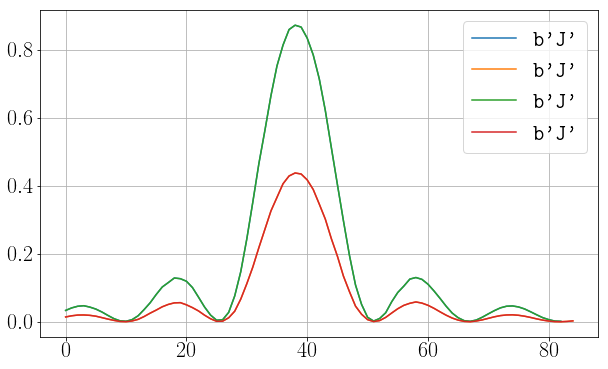

In [37]:
mf0df[mf0df.columns[1:]].plot()

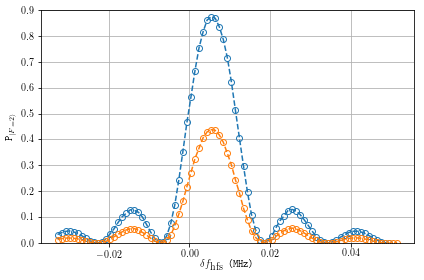

In [137]:
ax=spread_to_df(step2_new["spreads"][0],6834.682610904290).plot(x=b"A",y=b"J",legend=None,marker="o",mfc="None",linestyle="--")
spread_to_df(step2_new["spreads"][1],6834.682610904290).plot(x=b"A",y=b"J",ax=ax,legend=None,marker="o",mfc="None",linestyle="--")
plt.xlabel(r"$\delta f_\textnormal{hfs}$ (MHz)")
plt.ylabel(r"P$_{\ket{F=2}}$")
plt.ylim(0,0.9)
plt.tight_layout()
plt.savefig("../step2_mf0.pdf")


In [77]:
515*3.2**2

5273.600000000001

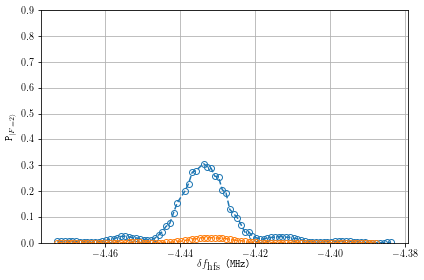

In [139]:
ax=spread_to_df(step2_new["spreads"][3],6834.682610904290).plot(x=b"A",y=b"J",legend=None,marker="o",mfc="None",linestyle="--")
spread_to_df(step2_new["spreads"][2],6834.682610904290).plot(x=b"A",y=b"J",ax=ax,legend=None,marker="o",mfc="None",linestyle="--")
plt.xlabel(r"$\delta f_\textnormal{hfs}$ (MHz)")
plt.ylabel(r"P$_{\ket{F=2}}$")
plt.ylim(0,0.9)
plt.tight_layout()
plt.savefig("../step2_mf1.pdf")

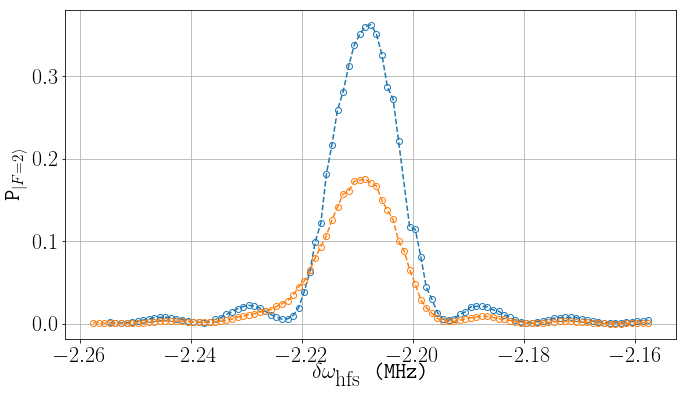

In [12]:
ax=spread_to_df(step2_new["spreads"][4],6834.682610904290).plot(x=b"A",y=b"J",legend=None,marker="o",mfc="None",linestyle="--")
spread_to_df(step2_new["spreads"][5],6834.682610904290).plot(x=b"A",y=b"J",ax=ax,legend=None,marker="o",mfc="None",linestyle="--")
plt.xlabel(r"$\delta f_\textnormal{hfs}$ (MHz)")
plt.ylabel(r"P$_{|F=2\rangle}$")
plt.tight_layout()

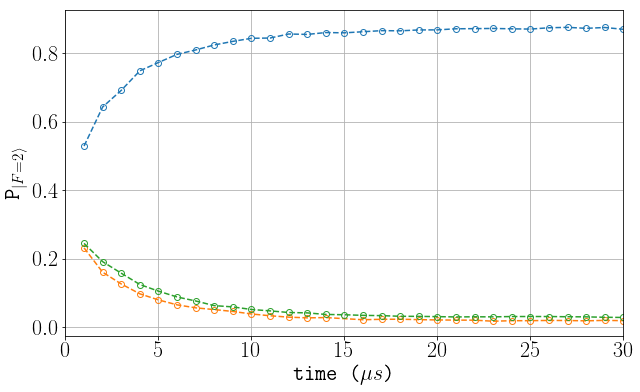

In [70]:
dfs = [pd.read_csv(x,sep=" ",index_col=1).iloc[0:] for x in glob("20170717/*ScanStep2Dur*DetSigPSigP*.dat")]
df = pd.DataFrame()
df.index = dfs[0].index
df["0"] = dfs[2]["Prob_PD1"]
df["m1"] = dfs[1]["Prob_PD1"]
df["p1"] = dfs[3]["Prob_PD1"]
df = pd.DataFrame(index=dfs[0].index)
df["0"] = dfs[2]["Prob_PD1"]
df["m1"] = dfs[1]["Prob_PD1"]
df["p1"] = dfs[3]["Prob_PD1"]
df["sum"] = df["0"]+df["m1"]+df["p1"]
df["0"]/=df["sum"]
df["m1"]/=df["sum"]
df["p1"]/=df["sum"]
df=df.dropna()
df.plot(y=["0","m1","p1"],legend=None,marker="o",mfc="None",linestyle="--")
plt.xlim(0,30)
plt.ylim(0,1)
plt.xlabel("time ($\mu s$)")
plt.ylabel(r"P$_{|F=2\rangle}$")
plt.savefig("../step2_pumping.pdf")

In [11]:
ls Microwave/

20170624/  20170912/  20170913/  20171109/  20171114/  20171123/


In [13]:
glob("20170717/*ScanStep2Dur*DetSigPSigP*.dat")

['20170717/05_ScanStep2Dur_MWON_DetSigPSigP.dat',
 '20170717/16_ScanStep2Dur_MWONMfm11_DetSigPSigP.dat',
 '20170717/17_ScanStep2Dur_MWONMf00_DetSigPSigP.dat',
 '20170717/19_ScanStep2Dur_MWONMfp11_DetSigPSigP.dat']

#### Microwave

In [ ]:
glob

In [12]:
micro_spread = liborigin.parseOriginFile("Microwave/20170913/20170913.opj")
micro_spread_mw = liborigin.parseOriginFile("Microwave/20170913/20170913_MW.opj")
micro_spread_ba = liborigin.parseOriginFile("Microwave/20170913/20170913_BA.opj")

Origin file version: 9.31
10 0 0 4 0
Loading book #0(b'A01MWfreqScan'/b'01-MWfreqScan_Zbias_0p5V.ahs\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170913\\01-MWfreqScan_Zbias_0p5V.ahs') (1 sheets, 6 columns)
Loading book #1(b'A02MWfreqScan'/b'02_MWfreqScan_Zbias_1p5V.ahs\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170913\\02_MWfreqScan_Zbias_1p5V.ahs') (1 sheets, 7 columns)
Loading book #2(b'A03MWRabi6835'/b'03_MWRabi_6835p6MHz_Zbias_1p5V.ahs\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170913\\03_MWRabi_6835p6MHz_Zbias_1p5V.ahs') (1 sheets, 6 columns)
Loading book #3(b'A04MWRabi6834'/b'04_MWRabi_6834p685MHz_Zbias_1p5V.ahs\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170913\\04_MWRabi_6834p685MHz_Zbias_1p5V.ahs') (1 sheets, 6 columns)
Loading book #6(b'A05MWRabi6834'/b'05_MWRabi_6834p685MHz_Zbias_0p5V.ahs\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170913\\05_MWRabi_6834p685MHz_Zbias_0p5V.ahs') (1 sheets, 7 columns)
Loading book #12(b'A06MWRabi6834'/b'06_MWRabi_6834p685MHz_Zbias_3V.ah

In [12]:
rabi_1 = spread_to_df(micro_spread["spreads"][0])
rabi_1_ba = spread_to_df(micro_spread_ba["spreads"][0])

In [48]:
micro2 = liborigin.parseOriginFile("Microwave/20170912/20170912.opj")

Origin file version: 9.31
8 0 0 3 0
Loading book #0(b'ScanMOTCtrlIm'/b'Scan_MOTCtrlImg_MOTMaster.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170912\\Scan_MOTCtrlImg_MOTMaster.dat') (1 sheets, 10 columns)
Loading book #1(b'ScanMOTCtrlI1'/b'Scan_MOTCtrlImg_Cicero.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170912\\Scan_MOTCtrlImg_Cicero.dat') (1 sheets, 10 columns)
Loading book #3(b'A02ScanYBiasI'/b'02_ScanYBiasInt.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170912\\02_ScanYBiasInt.dat') (1 sheets, 10 columns)
Loading book #5(b'A02ScanZBiasI'/b'02_ScanZBiasInt.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170912\\02_ScanZBiasInt.dat') (1 sheets, 10 columns)
Loading book #6(b'A02ScanXBiasI'/b'02_ScanXBiasInt.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170912\\02_ScanXBiasInt.dat') (1 sheets, 10 columns)
Loading book #7(b'A02ScanZBias1'/b'02_ScanZBiasInt_2.dat\r\\\\155.198.206.40\\Navigator_Data\\Data\\20170912\\02_ScanZBiasInt_2.dat') (1 sheets, 10 columns)
Loading 

In [65]:
m0_s1=pd.read_csv(glob("Microwave/20170912/*.ahs")[0],sep="\t",header=1,names=["Index","V1","V2","P1","P2","VTot"])
m0_s2=pd.read_csv(glob("Microwave/20170912/*.ahs")[3],sep="\t",header=1,names=["Index","V1","V2","P1","P2","VTot"])
m0_ba=pd.read_csv(glob("Microwave/20170912/*.ahs")[6],sep="\t",header=1,names=["Index","V1","V2","P1","P2","VTot"])

In [13]:
def load_ahs(filename,detuning=6834.682610904290):
    df = pd.read_csv(filename,sep="\t",header=1,index_col=0)
    df.index =df.index-detuning
    return df[df["NTot"]>0.4]
step1 =load_ahs("Microwave/20171123/04_Step1_MW_FreqScan.ahs")
step2 = load_ahs("Microwave/20171123/04_Step1_step2_mfpm1_BA_MW_FreqScan.ahs")
raman = load_ahs("Microwave/20171123/04_Step1_step2_mfpm1_BA_13ms_Raman_40us_12dB_FreqScan.ahs")

Microwave/20170913/13_MWRabi_6833p009MHz_Zbias_3V.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


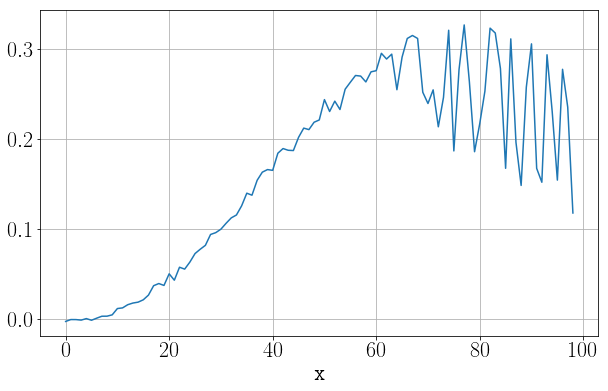

Microwave/20170913/06_MWRabi_6834p685MHz_Zbias_3V.ahs


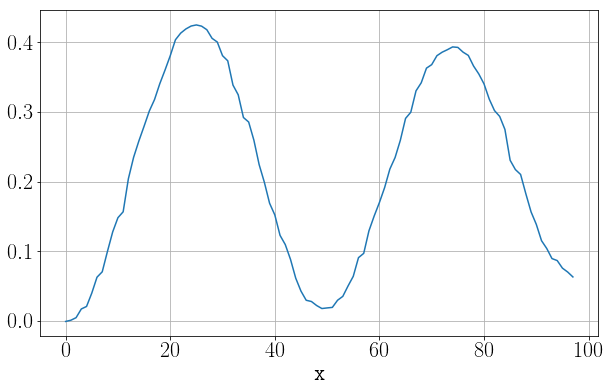

Microwave/20170913/13_MWRabi_6834p685MHz_Zbias_3V.ahs


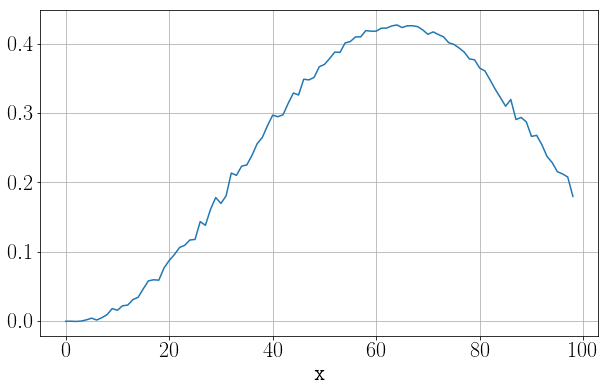

Microwave/20170913/13_MWRabi_6836p361MHz_Zbias_3V.ahs


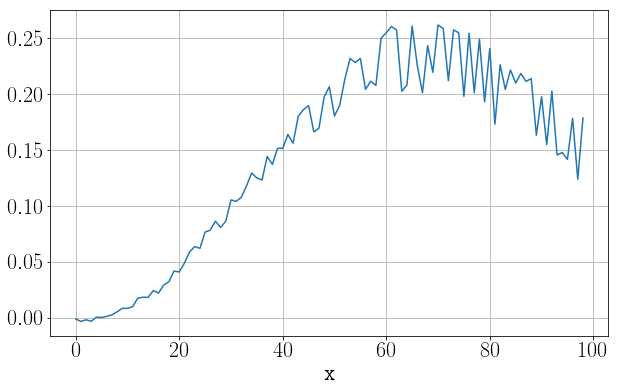

Microwave/20170913/15_MWRabi_6833p009MHz_Zbias_3V_Step1and2.ahs


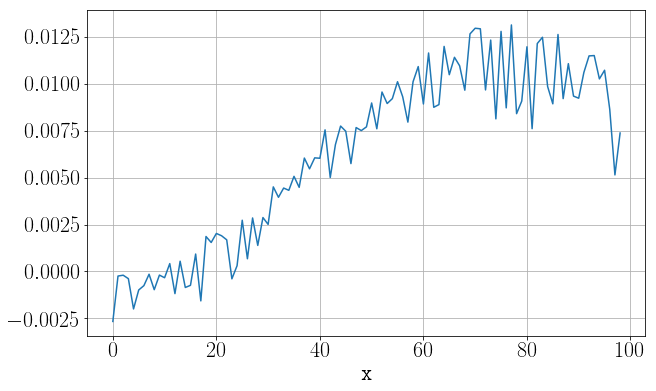

Microwave/20170913/15_MWRabi_6834p685MHz_Zbias_3V_Step1and2.ahs


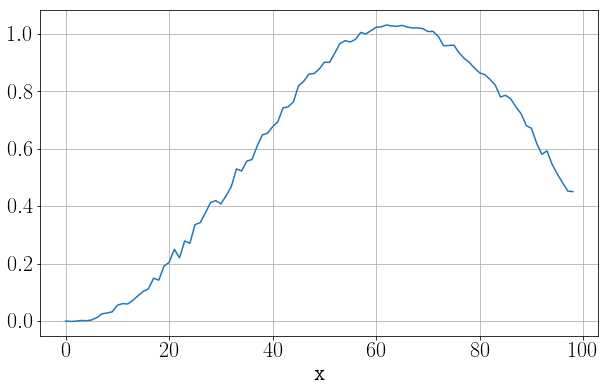

Microwave/20170913/15_MWRabi_6836p36MHz_Zbias_3V_Step1and2.ahs


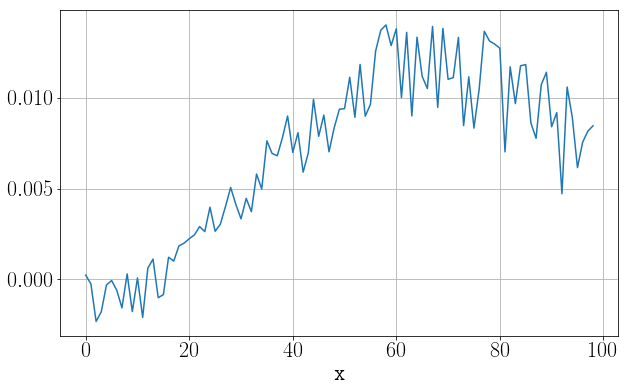

In [43]:
for dFile in glob("Microwave/20170913/*MWRabi*3V*.ahs"):
    print(dFile)
    df = pd.read_csv(dFile,sep=",|\t| ",header=0,index_col=0)
    df["RN2"]=df[df.columns[3]]
    df.plot(y="RN2",legend=None)
    plt.xlabel("x")
    plt.show()

/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


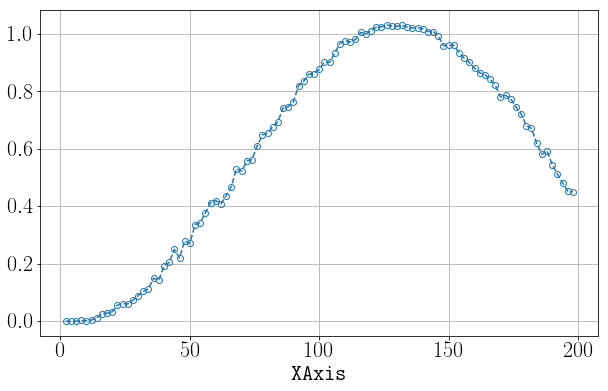

In [49]:
df=pd.read_csv("Microwave/20170913/15_MWRabi_6834p685MHz_Zbias_3V_Step1and2.ahs",sep=",|\t| ",header=0,index_col=0)
df.plot(x="XAxis",y="RN2",legend=None,marker="o",mfc="None",linestyle="--")

(0, 0.01)

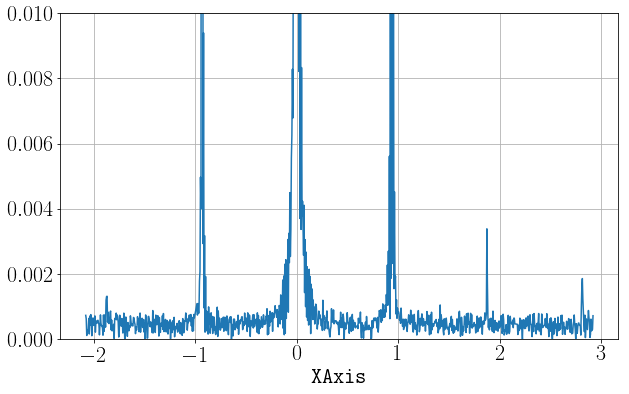

In [35]:
step2.plot(y="RN2",legend=None)
plt.ylim(0,0.01)

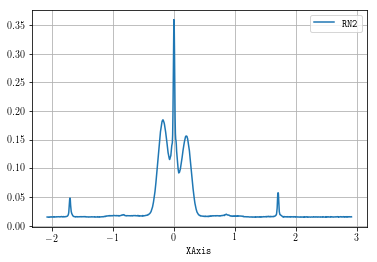

In [107]:
raman.plot(y="RN2")

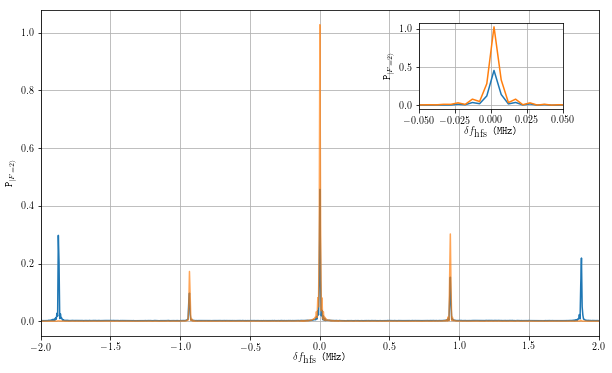

In [142]:
plt.figure(figsize=(10,6))
ax =plt.gca()
step1.plot(y="RN2",legend=None,ax=ax,xlim=(-2,2),alpha=1)
step2.plot(y="RN2",ax=ax,legend=None,xlim=(-2,2),alpha=0.7)
plt.xlabel(r"$\delta f_\textnormal{hfs}$ (MHz)")
plt.ylabel(r"P$_{|F=2\rangle}$")
inset_ax = plt.axes([.65, .65, .2, .2])
step1.plot(y="RN2",ax = inset_ax,xlim=(-0.05,0.05),legend=None)
step2.plot(y="RN2",ax = inset_ax,xlim=(-0.05,0.05),legend=None)
plt.xlabel(r"$\delta f_\textnormal{hfs}$ (MHz)")
plt.ylabel(r"P$_{|F=2\rangle}$")
plt.savefig("../microwave_spectrum_1.svg")

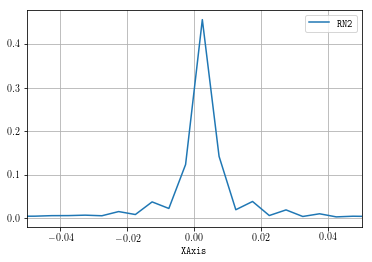

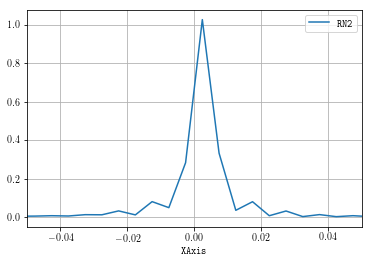

In [112]:
step1.plot(y="RN2",xlim=(-0.05,0.05))
step2.plot(y="RN2",xlim=(-0.05,0.05))

In [169]:
mwFile = glob("Microwave/20170624/*.dat")[-2]

In [173]:
mwData = pd.read_csv("MW_Rabi_Fit.csv",header=None)

In [186]:
def decay_env(t,g= 0.000983449,off= 0.436578,a=0.902801):
    return (a* np.exp(-g*t) + off* (1 - np.exp(-g*t))),2*off-(a* np.exp(-g*t) + off* (1 - np.exp(-g*t)))

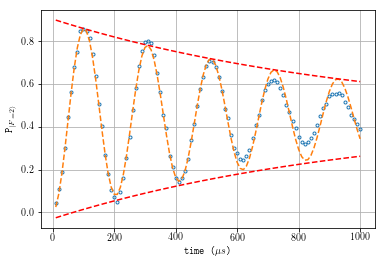

In [192]:
ax=mwData.plot(x=0,y=1,legend=False,mfc='None',style='.')
mwData.plot(x=0,y=2,legend=False,linestyle="--",ax=ax)
ax.plot(mwData[0],[decay_env(x) for x in mwData[0]],linestyle="--",color="r")
plt.xlabel("time ($\mu s$)")
plt.ylabel(r"P$_{|F=2\rangle}$")
plt.savefig("../mw_rabi.pdf")

In [ ]:
l=liborigin.parseOriginFile("Microwave/20170912/20170912.obj")

20171114/MW2_6dBm_6832806_mwTimeScan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


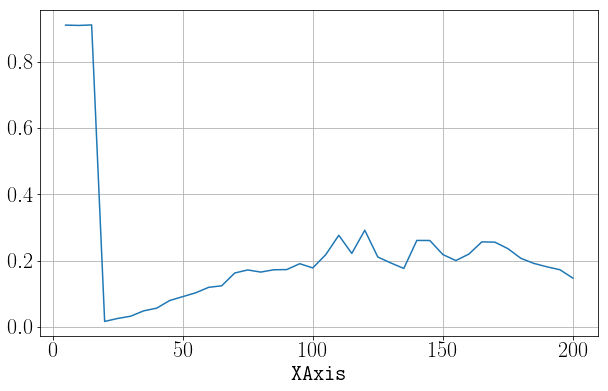

20171114/MW2_6p4dBm_6836570_mwTimeScan.ahs


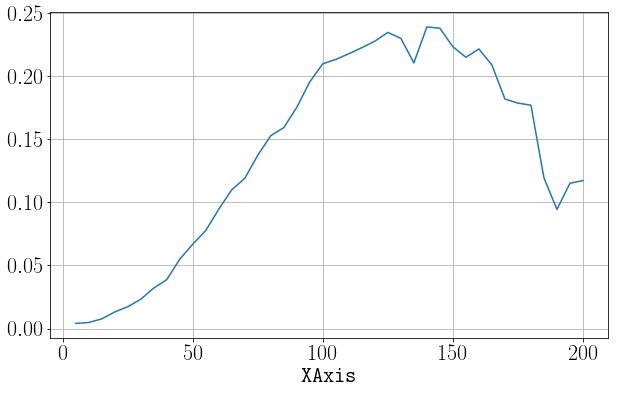

20171114/MW2_6p5dBm_6832806_mwTimeScan.ahs


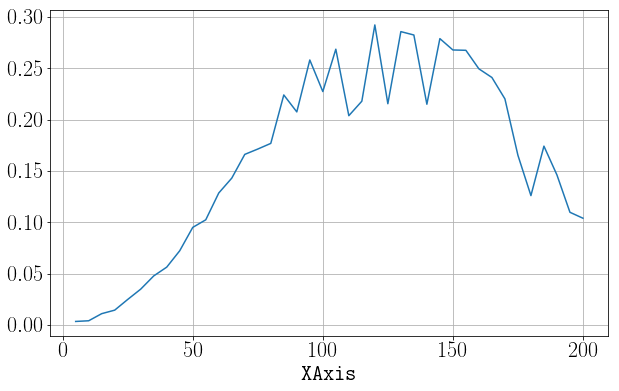

20171114/MW2_7dBm_6832806_mwTimeScan.ahs


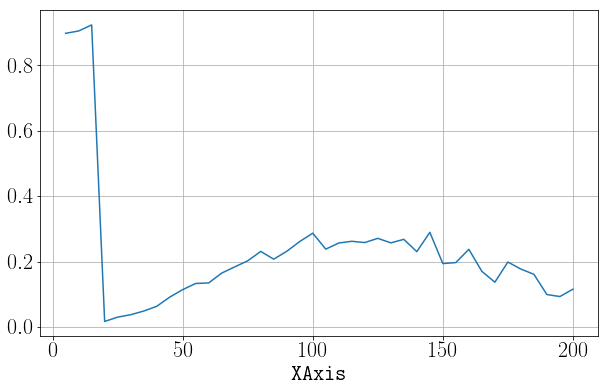

20171114/MW2_7dBm_6836570_mwTimeScan.ahs


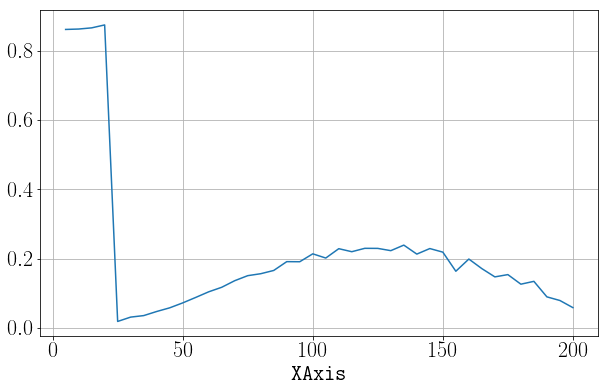

20171114/MW2_8dBm_6836570_mwTimeScan.ahs


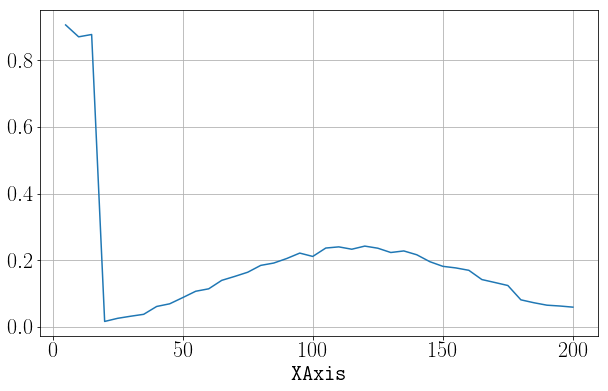

20171114/MW_6832806_mwTimeScan.ahs


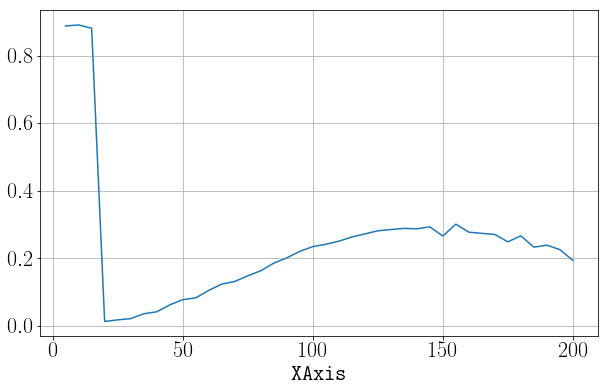

20171114/MW_6834689_mwTimeScan.ahs


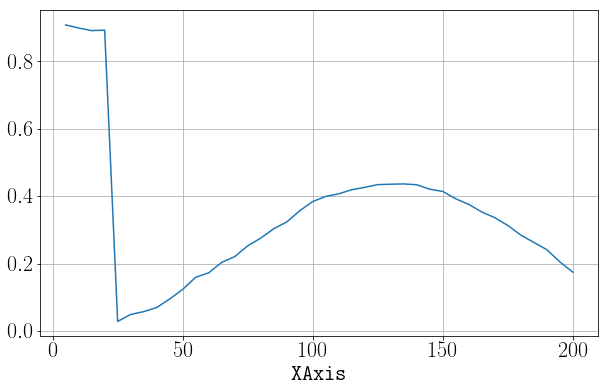

20171114/MW_6836570_mwTimeScan.ahs


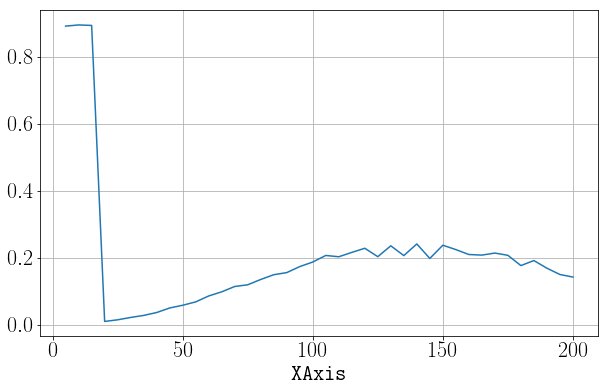

20171114/Winfreak1_0to0_Spec.ahs


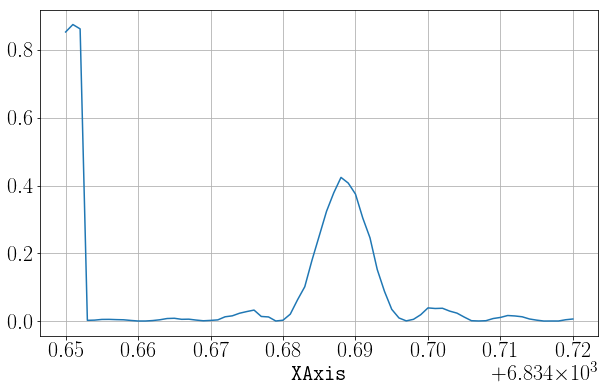

20171114/Winfreak1_m1tom1_Spec.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


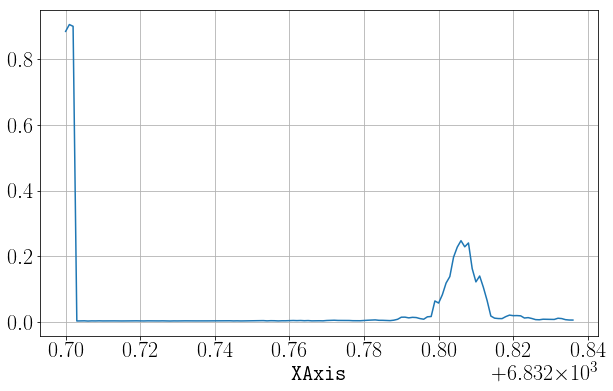

20171114/Winfreak1_p1top1_Spec.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


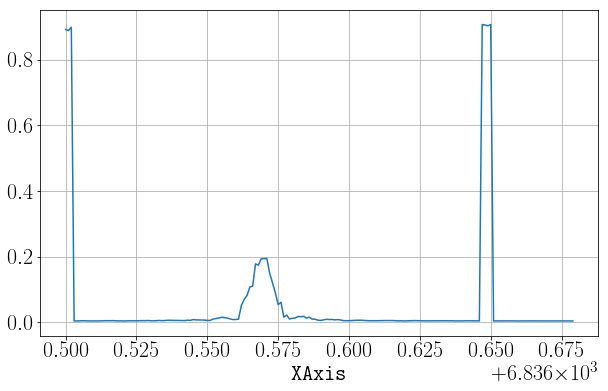

In [27]:
for dFile in glob("20171114/*.ahs"):
    print(dFile)
    df = pd.read_csv(dFile,header=1,sep="\t")
    df.plot(x="#XAxis",y=["RN2"],legend=None)
    plt.show()

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_repump_MW_6836571_timescan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


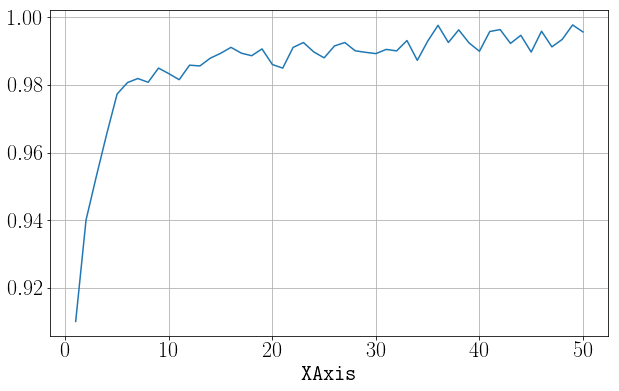

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_norepump_MW_6831858_timescan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


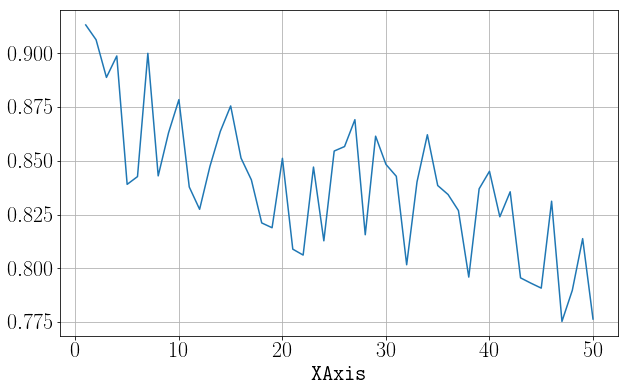

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_norepump_MW_6832799_timescan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


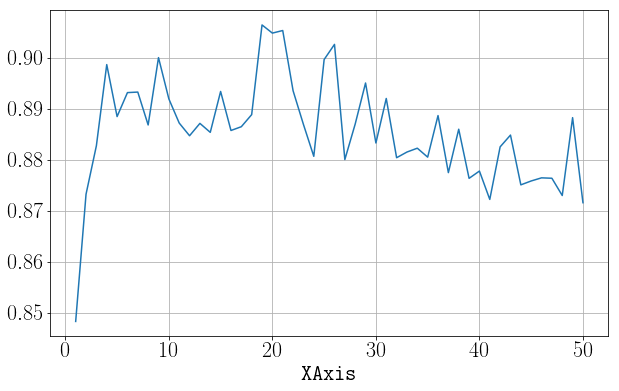

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_norepump_MW_6834685_timescan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


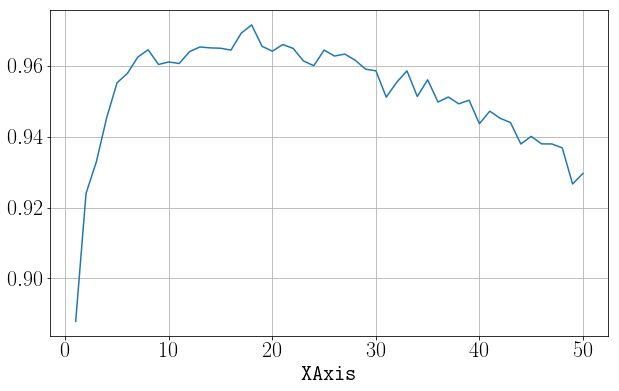

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_norepump_MW_6835626_timescan.ahs


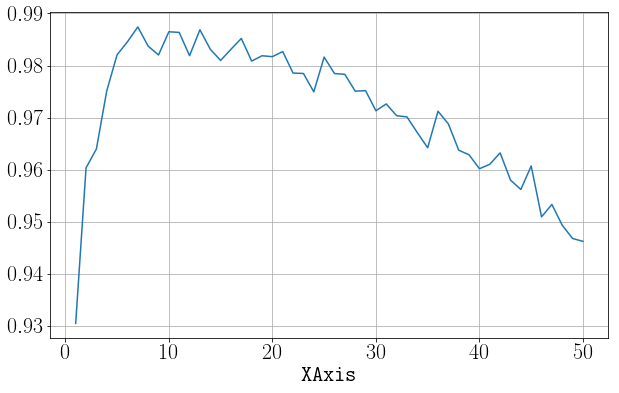

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_norepump_MW_6836571_timescan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


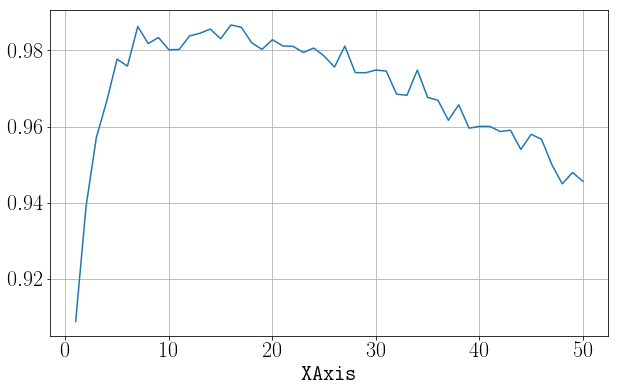

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_norepump_MW_6837501_timescan.ahs


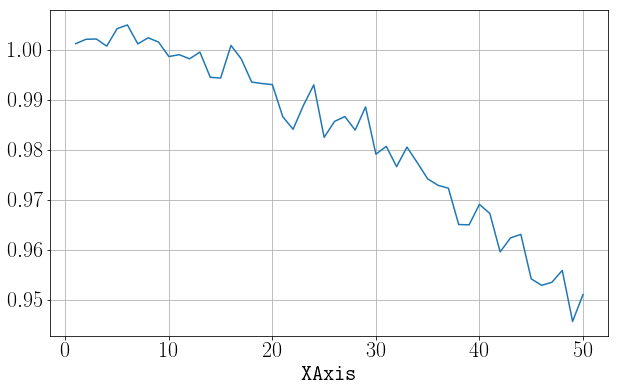

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_norepump_MW_6837512_timescan.ahs


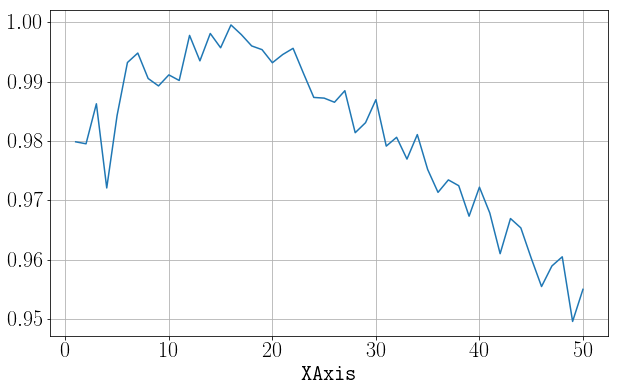

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_norepump_timescan.ahs


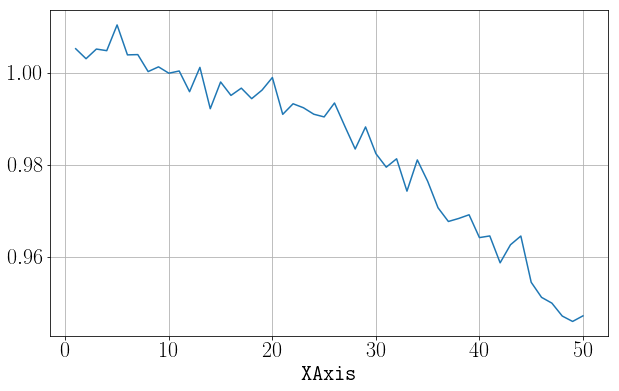

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_repump_MW_6831858_timescan.ahs


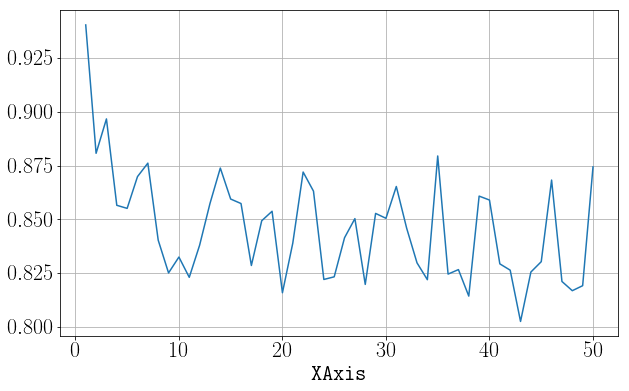

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_repump_MW_6832799_timescan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


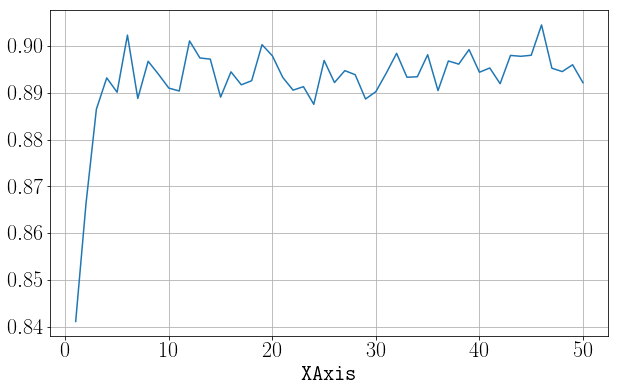

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_repump_MW_6834685_timescan.ahs


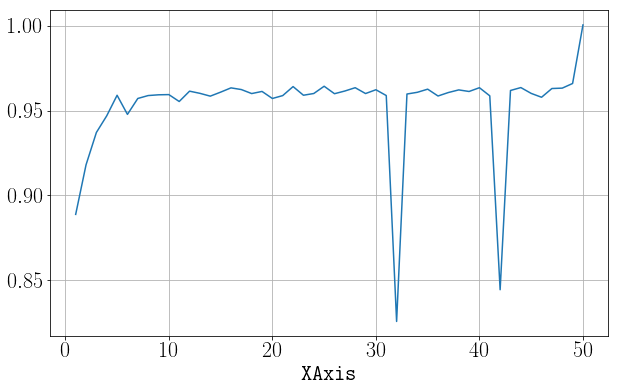

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_repump_MW_6835626_timescan.ahs


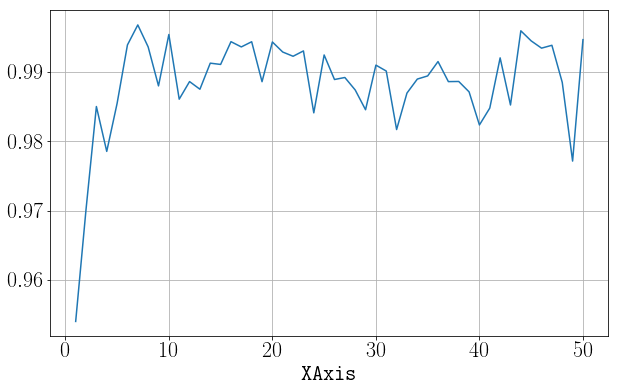

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_repump_MW_6837501_timescan.ahs


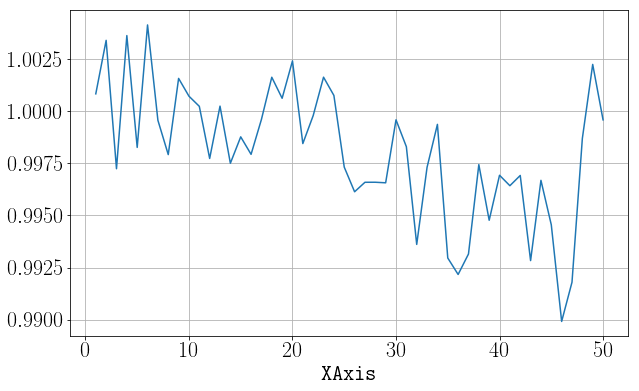

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_repump_MW_6837512_timescan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


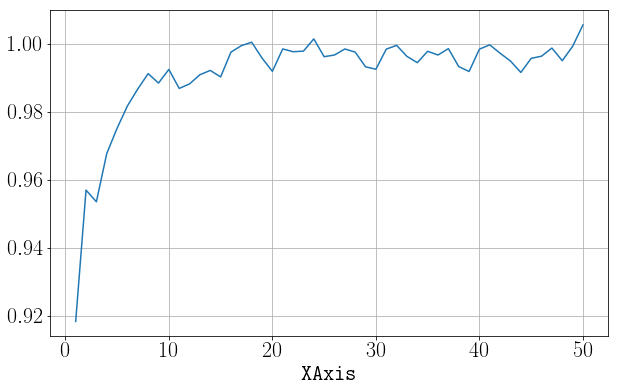

Microwave/20171109/OptiPump_motCtrl0p4V_mphiCtrl_0p25V_repump_timescan.ahs


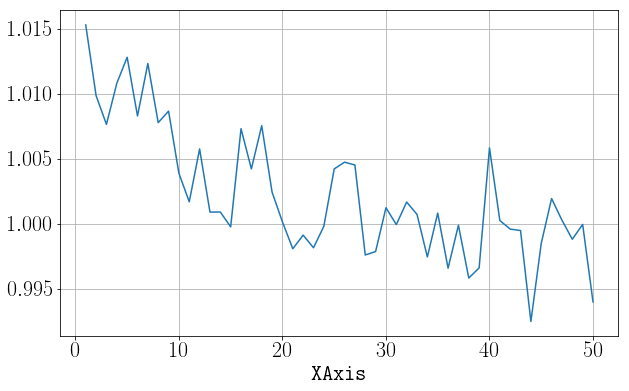

Microwave/20171109/Repump_MWFreqScan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


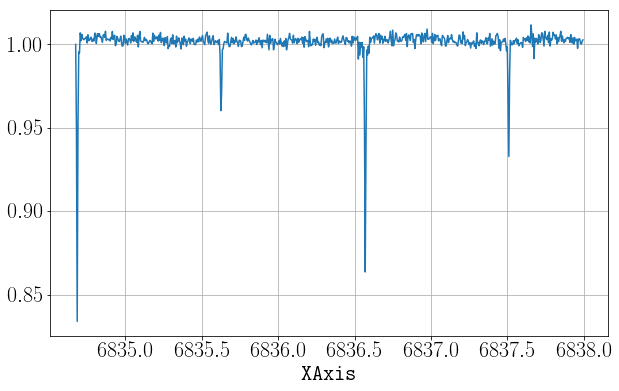

Microwave/20171109/Repump_MWFreqScan2.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


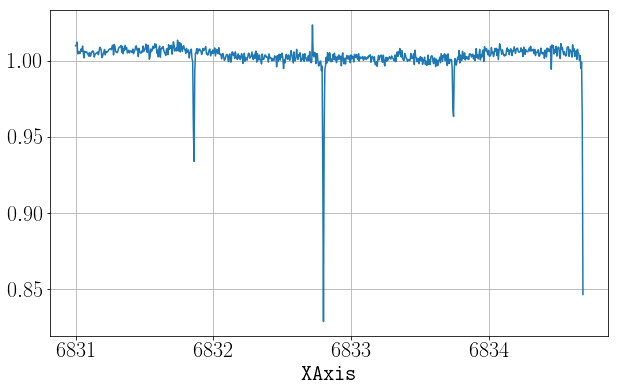

Microwave/20171109/Repump_MW_6835626_mwTimeScan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


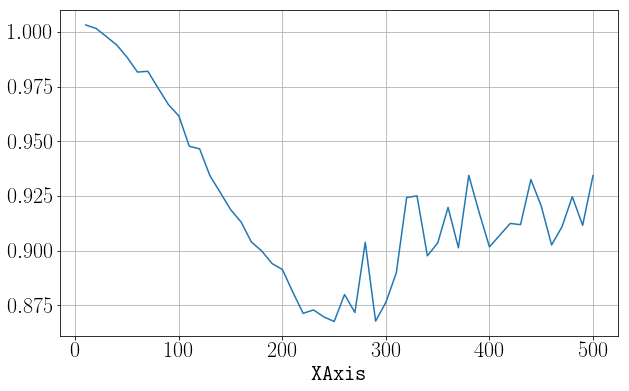

Microwave/20171109/Repump_MW_6837501_mwTimeScan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


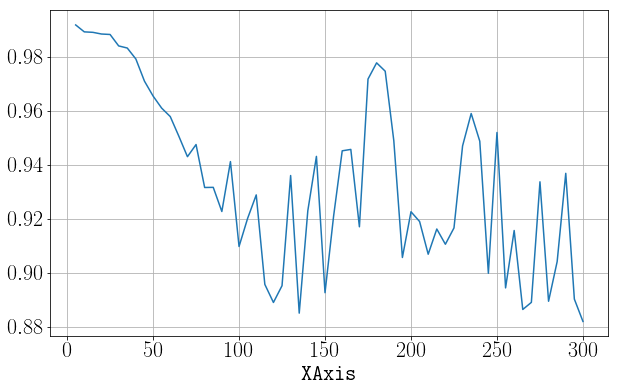

Microwave/20171109/Repump_MW_BA_Raman40us_22dB15dB_FreqScan.ahs


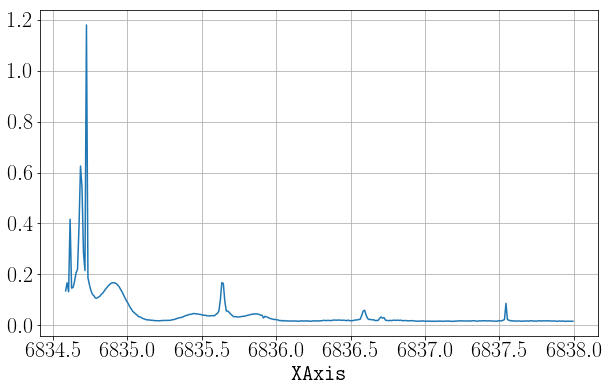

In [36]:
for dFile in glob("Microwave/20171109/*.ahs"):
    print(dFile)
    df = pd.read_csv(dFile,header=1,sep="\t")
    df.plot(x="#XAxis",y=["RN2"],legend=None)
    plt.show()

#### Blow-Away

In [59]:
blowdata={x:pd.read_csv(x,sep=" ") for x in glob("20170822/*Blow*.dat")}

In [8]:
class DatFile:
    def __init__(self,filename):
        self.df = pd.read_csv(filename, sep=" ")
        self.df["N1_Mean"] = self.df["N12_Mean"] - self.df["N2_Mean"]
        self.df[self.df["N12_Mean"]<0.3]
        
    def plot_atom_numbers(self):
        ax=self.df.plot(x="X_Axis",y="N2_Mean",legend=None)
        self.df.plot(x="X_Axis",y="N1_Mean",legend=None,ax=ax)
        plt.show()
    def plot_prob(self):
        self.df.plot(x="X_Axis", y="Prob_PD1", legend=None)

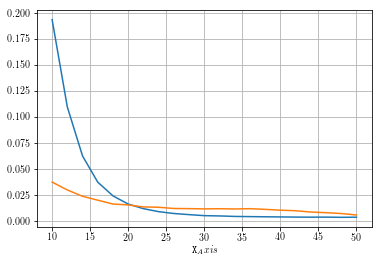

In [81]:
df = blowdata['20170822/BlowAway_2TScan.dat']
df["N1_Mean"] = df["N12_Mean"] - df["N2_Mean"]
ax=df.plot(x="X_Axis",y="N2_Mean",legend=None)
df.plot(x="X_Axis",y="N1_Mean",legend=None,ax=ax)

20170920/01_2DMOT200ms_2T50ms_MW_128us_ImgCtrll1p2V.dat


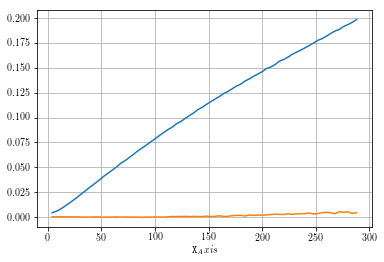

20170920/02_2DMOT200ms_2T50ms_MW_128us_ImgCtrll1p2V.dat


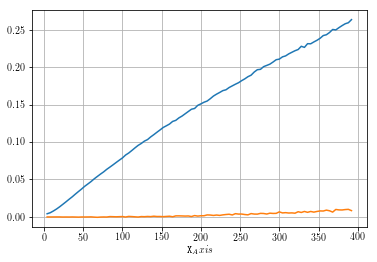

20170920/02_test.dat


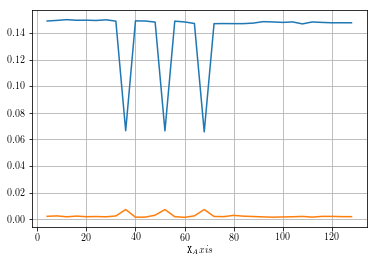

20170920/03_2DMOT200ms_2T8ms_BAFreqScan_700us.dat


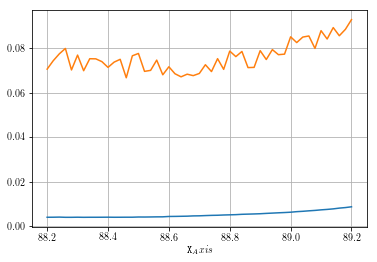

20170920/04_2DMOT200ms_2T8ms_ScanStep2_MW1BA1MW2BA2.dat


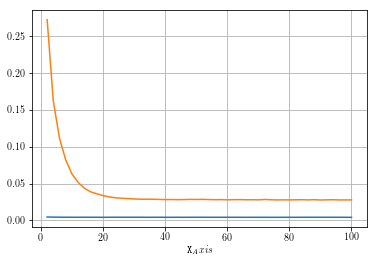

20170920/05_2DMOT200ms_2T8ms_ScanStep2_MW1BA1MW2BA2.dat


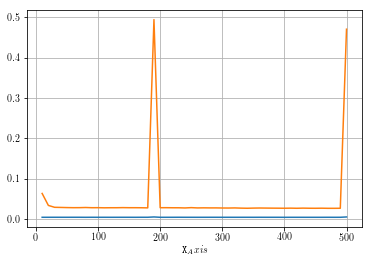

In [90]:
for dFile in glob("20170920/*.dat"):
    print(dFile)
    df = DatFile(dFile)
    df.plot_atom_numbers()

20170913/16_ScanXBiasInt_YBias3V_ZBias1V.dat


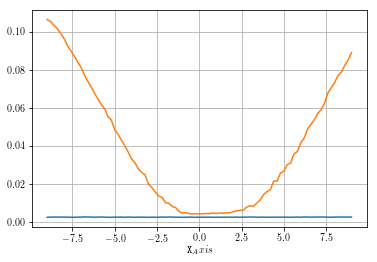

20170913/16_ScanXBiasInt_YBias_3V.dat


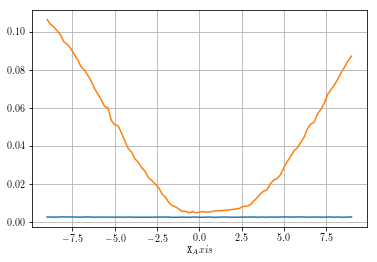

20170913/16_ScanZBiasInt_YBias3V_XBias0V.dat


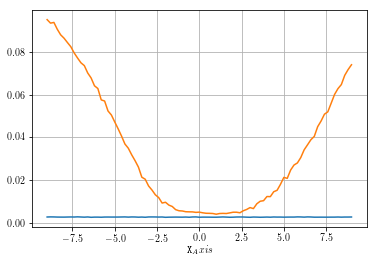

20170913/17_MW_130us_6834p685_Ybais3V_BAScanMOTCtrl_50us_MW2_130us.dat


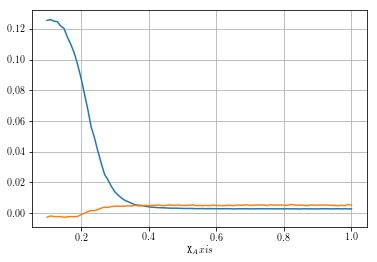

20170913/17_MW_130us_6834p685_Ybais3V_BAScanMOTFreq_50us_MW2_130us.dat


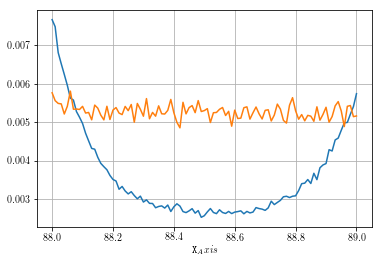

20170913/17_MW_130us_6834p685_Ybais3V_BAScan_MW2_130us.dat


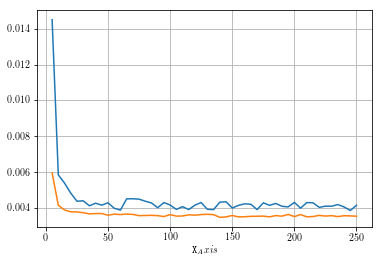

20170913/17_MW_130us_6834p685_Ybais3V_BA_MWRabiScan.dat


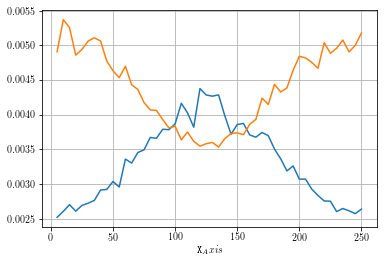

In [93]:
for dFile in glob("20170913/*.dat"):
    print(dFile)
    df = DatFile(dFile)
    df.plot_atom_numbers()

20171124/05_100msLoading_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_17dB_10ms_Prob22dB_TimeScan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


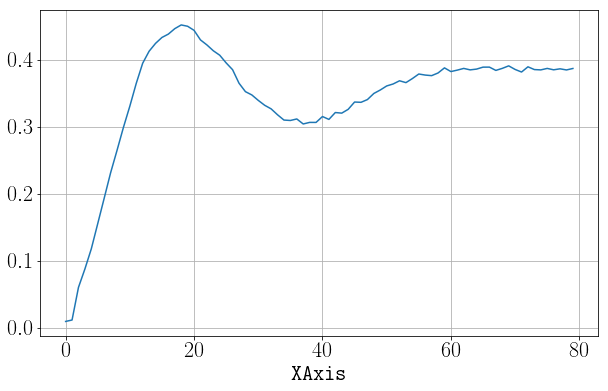

20171124/05_50msLoading_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_17dB_10ms_Prob22dB_TimeScan.ahs


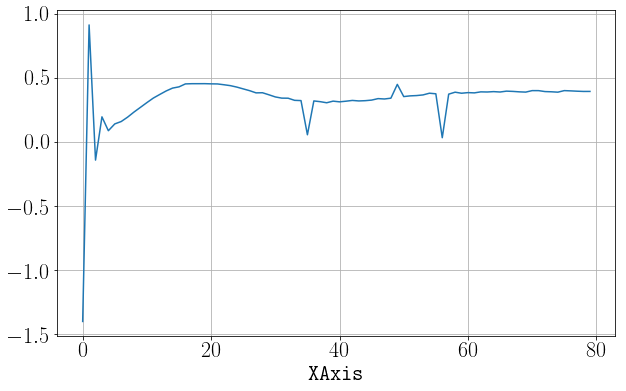

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_10dB_10ms_Prob80us_08dB_ChirpScan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


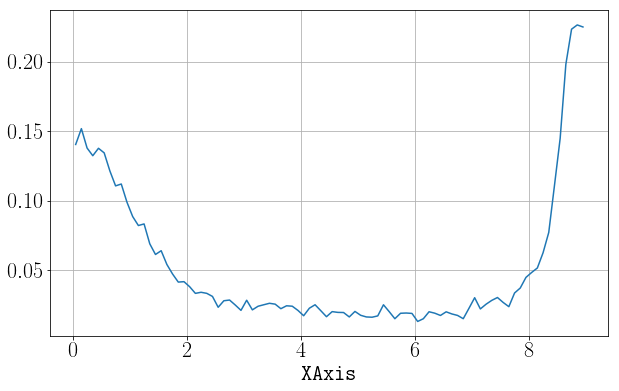

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_11dB_10ms_Prob22dB_TimeScan.ahs


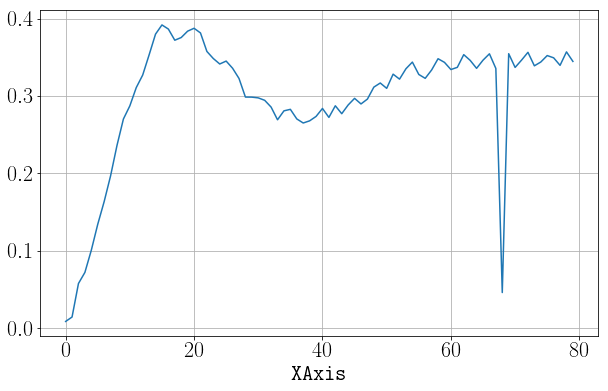

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_11dB_10ms_Prob80us_08dB_ChirpScan.ahs


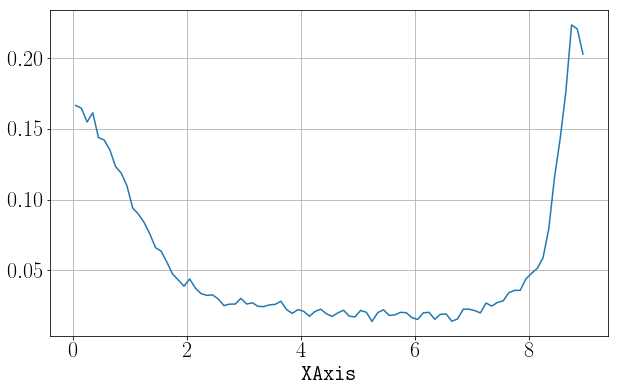

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_11dB_10ms_Prob80us_09dB_ChirpScan.ahs


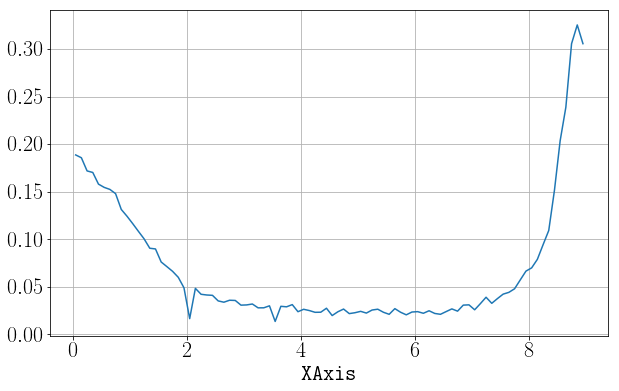

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_11dB_10ms_Prob80us_10dB_ChirpScan.ahs


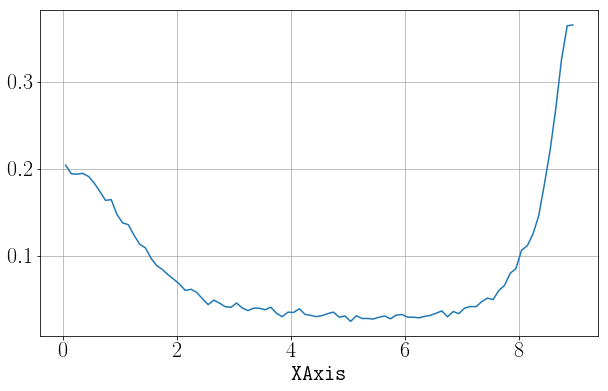

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_12dB_10ms_Prob80us_08dB_ChirpScan.ahs


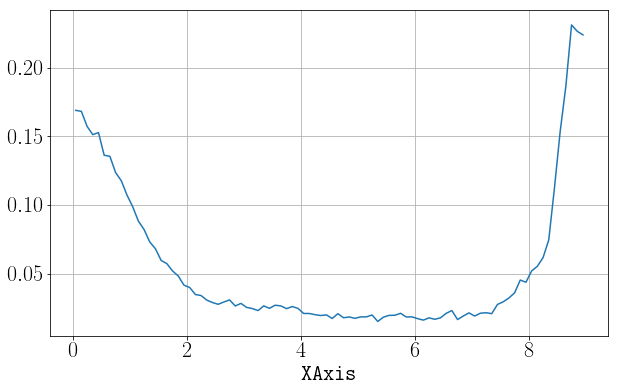

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_12dB_10ms_Prob80us_08dB_ChirpScanlarge.ahs


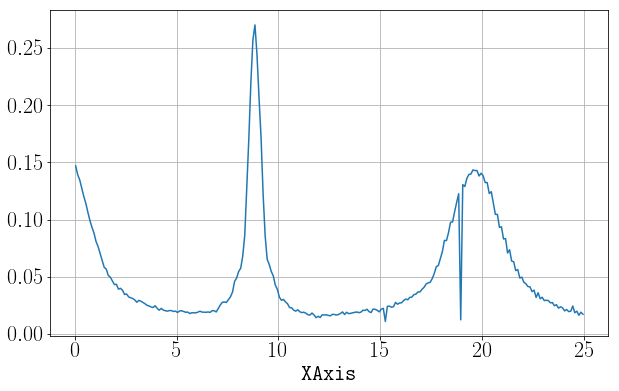

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_13dB_10ms_Prob80us_08dB_ChirpScan.ahs


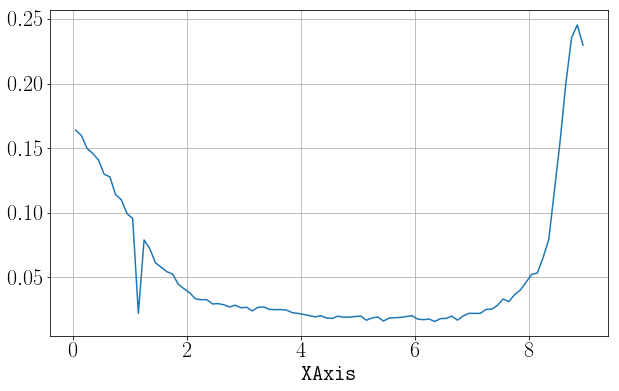

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_14dB_10ms_Prob80us_08dB_ChirpScan.ahs


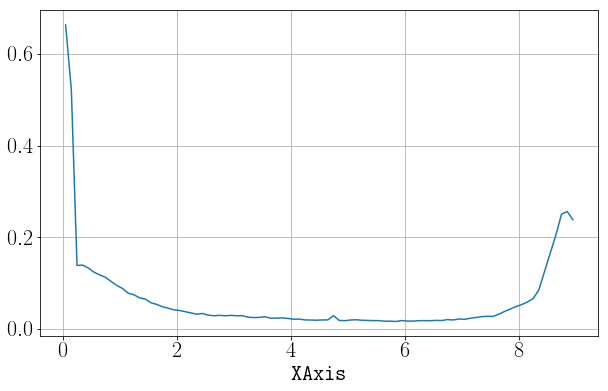

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_15dB_10ms_Prob80us_08dB_ChirpScan.ahs


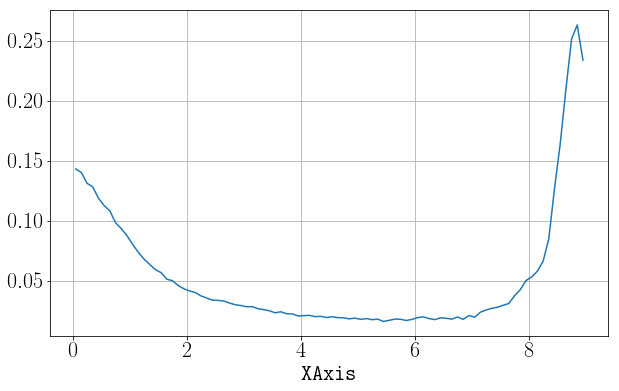

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_16dB_10ms_Prob80us_08dB_ChirpScan.ahs


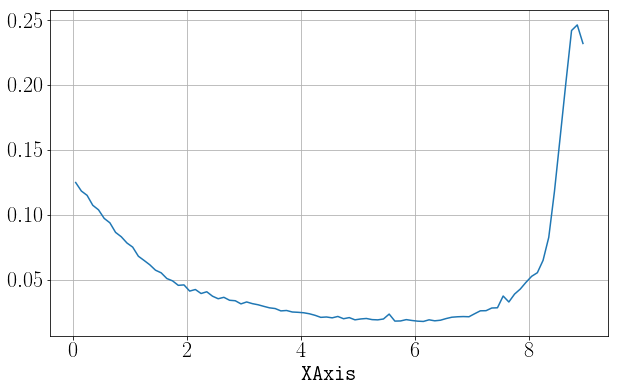

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_17dB_10ms_Prob22dB_TimeScan.ahs


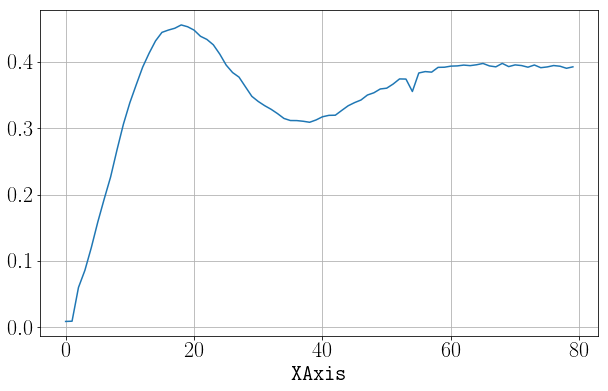

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_PowerScan.ahs


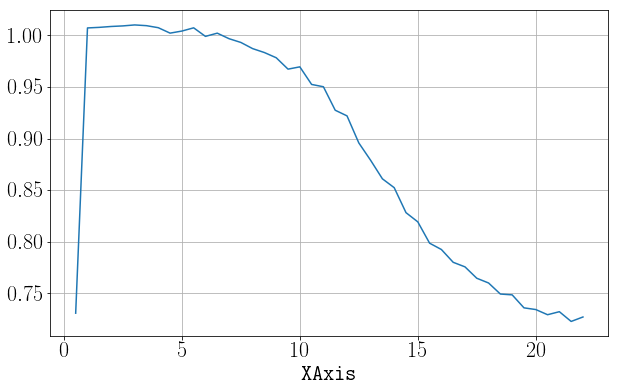

20171124/05_Step1_step2_mfpm1_BA_MW_1ms_Raman_20us_11dB_10ms_Prob80us_07dB_ChirpScan.ahs


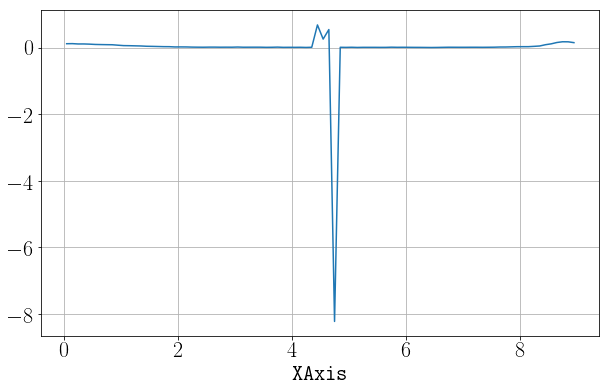

In [25]:
for dFile in glob("20171124/05*.ahs"):
    print(dFile)
    df = pd.read_csv(dFile,header=1,sep="\t")
    df.plot(x="#XAxis",y=["RN2"],legend=None)
    plt.show()

20171124/04_Step1_step2_mfpm1_BA_18ms_Raman_40us_12dB_FreqScan.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


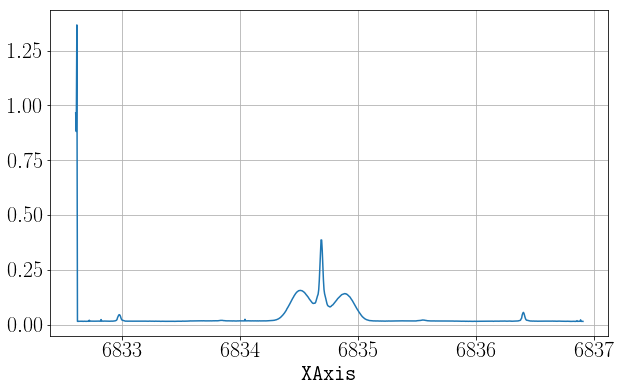

20171124/04_Step1_step2_mfpm1_BA_23ms_Raman_40us_12dB_FreqScan.ahs


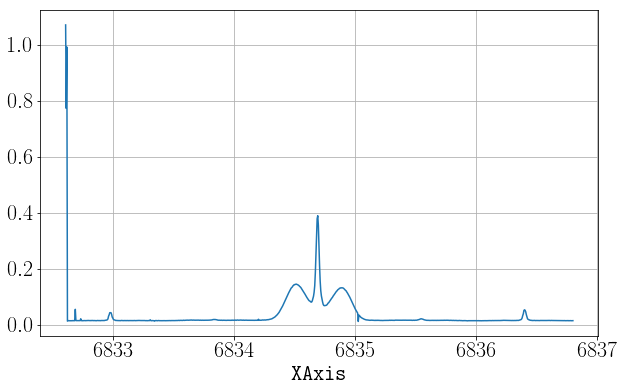

20171124/04_Step1_step2_mfpm1_BA_28ms_Raman_40us_12dB_FreqScan.ahs


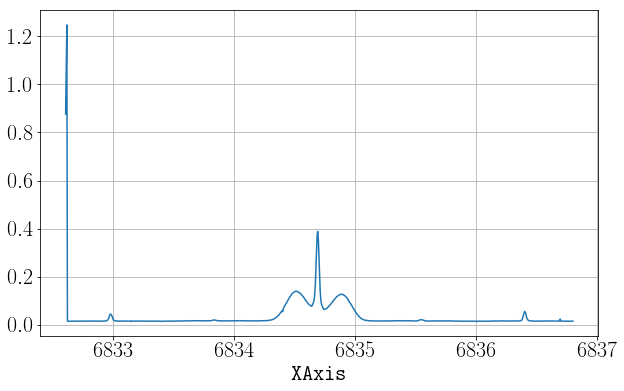

20171124/04_Step1_step2_mfpm1_BA_28ms_Raman_40us_12dB_FreqScanNew.ahs


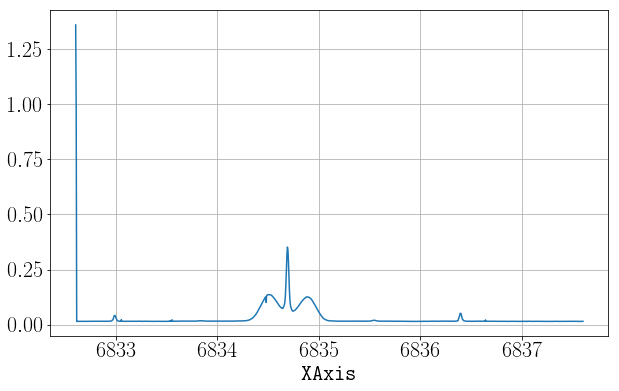

20171124/04_Step1_step2_mfpm1_BA_33ms_Raman_40us_12dB_FreqScan.ahs


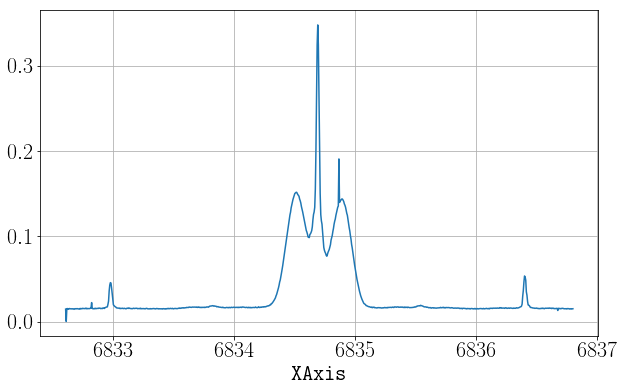

20171124/04_Step1_step2_mfpm1_BA_38ms_Raman_40us_12dB_FreqScan.ahs


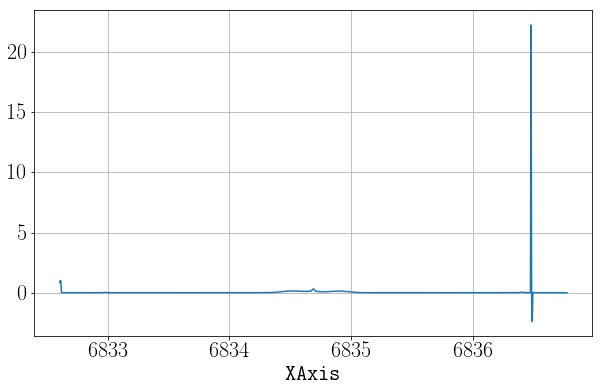

20171124/04_Step1_step2_mfpm1_BA_43ms_Raman_40us_12dB_FreqScan.ahs


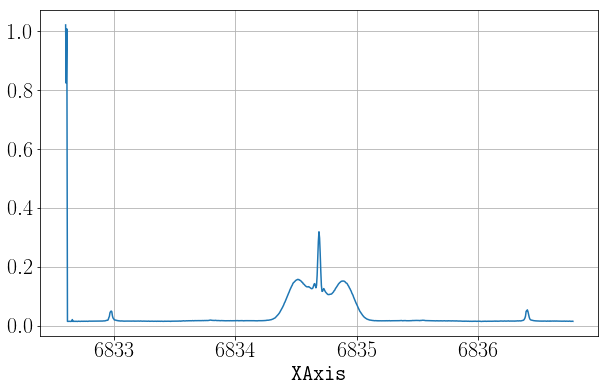

20171124/04_Step1_step2_mfpm1_BA_MW_28ms_Raman_40us_12dB_FreqScanNew.ahs


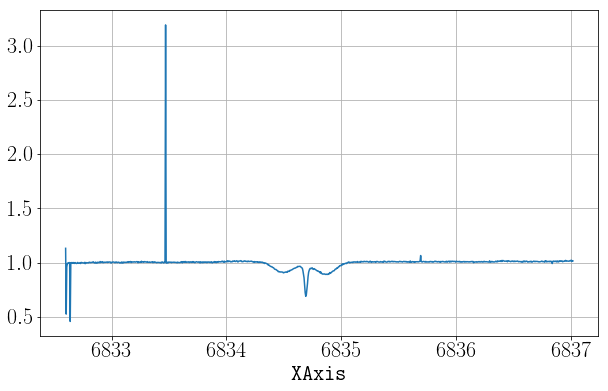

In [26]:
for dFile in glob("20171124/04*.ahs"):
    print(dFile)
    df = pd.read_csv(dFile,header=1,sep="\t")
    df.plot(x="#XAxis",y=["RN2"],legend=None)
    plt.show()

20171101/03_Atoms_BA.ahs


/home/jimmy/.virtualenvs/py3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


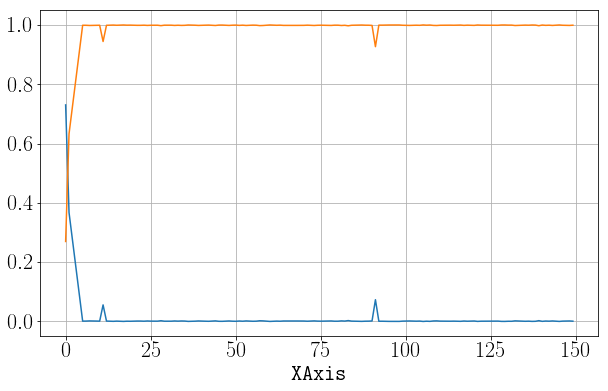

20171101/03_Atoms_Molasses.ahs


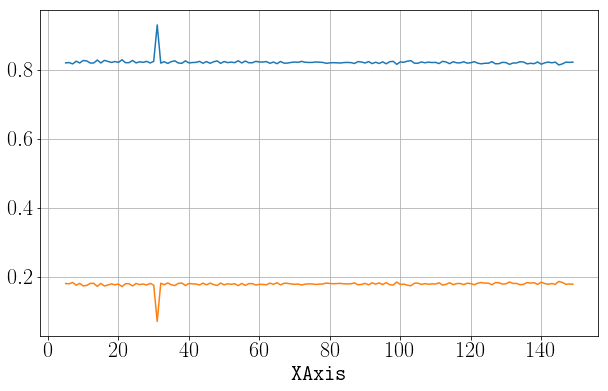

20171101/03_Atoms_Step12.ahs


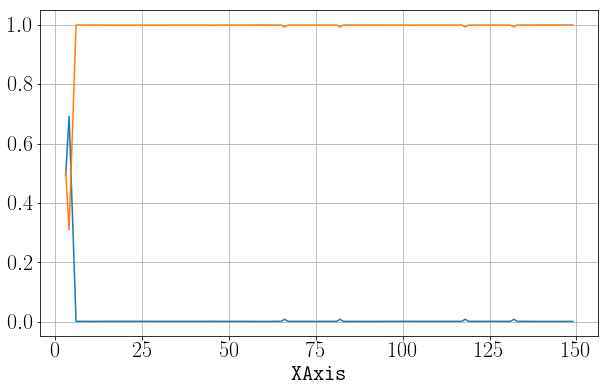

20171101/03_Atoms_Step12_MW.ahs


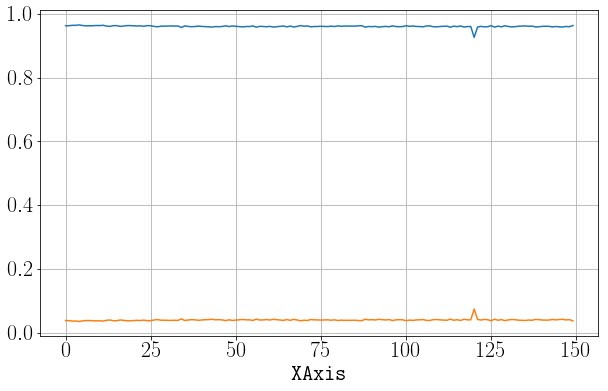

20171101/03_Atoms_Step12_MW__Vel160us_9dB22dB_BA.ahs


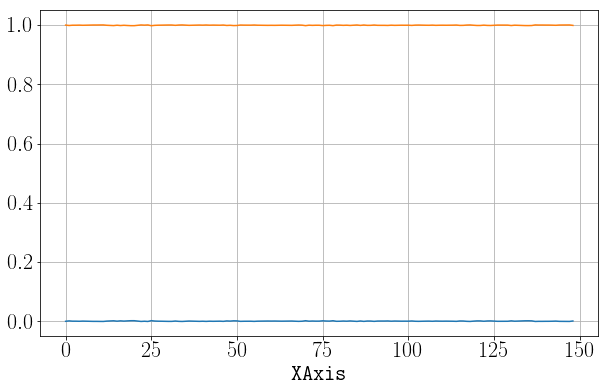

20171101/03_Atoms_Step12_MW__Vel160us_9dB22dB_BA_Raman1_160us_9dB22dB.ahs


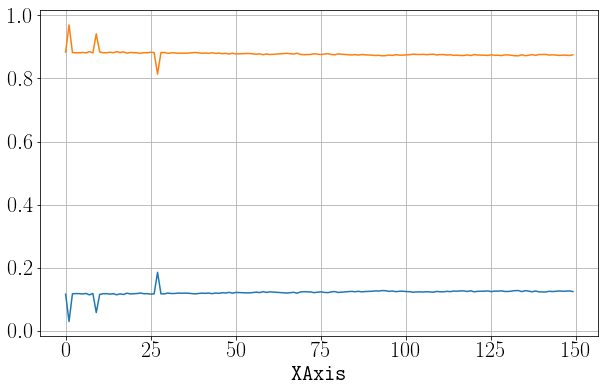

In [45]:
for dFile in glob("20171101/03*.ahs"):
    print(dFile)
    df = pd.read_csv(dFile,header=1,sep="\t")
    df = df[(df["RN2"]<1)&(df["RN2"]>0)]
    df.plot(x="#XAxis",y=["RN2","RN1"],legend=None)
    plt.show()

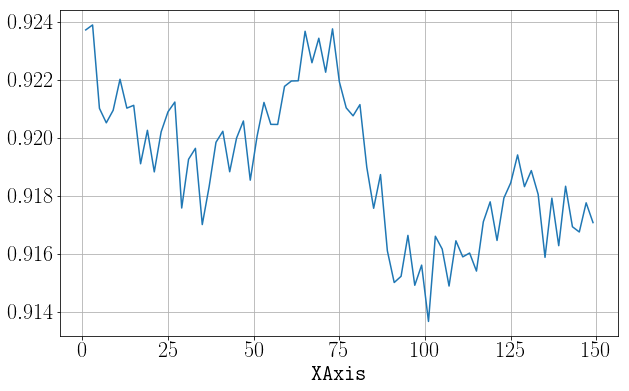

In [49]:
a=load_ahs("~/Documents/Data/20171026/02_StatePrep_Step2_Scan_MWPump.ahs",0)
a.plot(y="NTot",legend=None)

## Chapter 6

In [5]:
plotDataDirectory("Chapter6")

/media/Storage/Dropbox/PhDWork/Thesis/Figures/Chapter6/PlotData


### Fringe Contrast vs Beam Width

In [7]:
fringeDF=pd.read_csv("fringeContrast.txt",sep="\t",header=None,names=["x","y"])
fringeDF["reducedContrast"] = 1-fringeDF["y"]

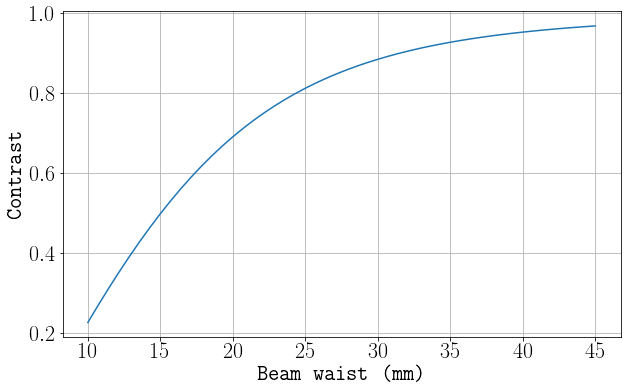

In [8]:
fringeDF.plot(x="x",y="y",logy=False,legend=False)
plt.xlabel("Beam waist (mm)")
plt.ylabel("Contrast")
plt.savefig("../fringe_contrast.pdf")

### Expected Contrast vs Phase Noise

In [14]:
phaseDF = pd.read_csv("phaseNoise.csv",header=None,names=["x","y"])

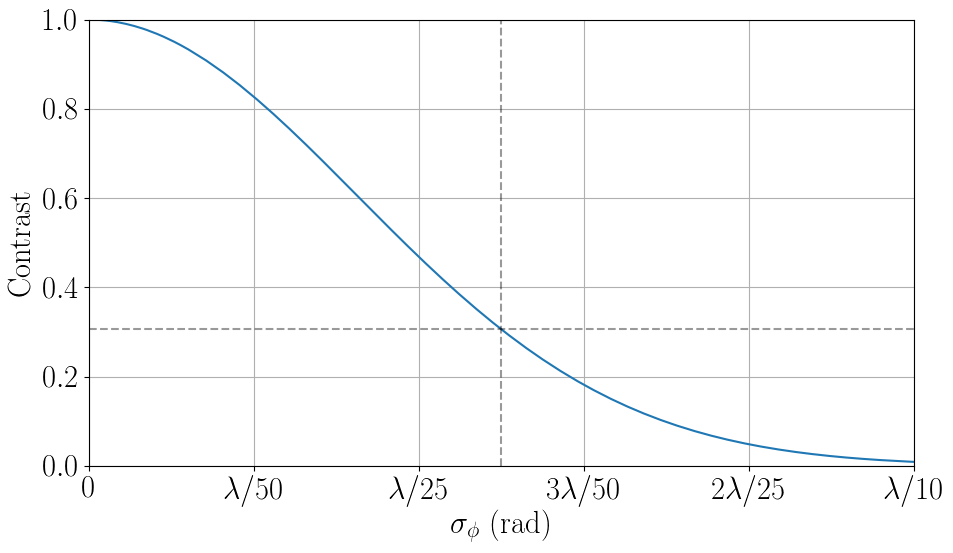

In [48]:
phaseDF.plot(x="x",y="y",logy=False,legend=False)
plt.plot([0.05,0.05],[0,1],linestyle="--",color="black",alpha=0.4)
plt.plot([0.0001,0.1],[0.305944,0.305944],linestyle="--",color="black",alpha=0.4)
plt.xlim(0,0.1)
plt.ylim(0,1.0)
plt.xticks([0,0.02,0.04,0.06,0.08,0.1],[0,r"$\lambda/50$",r"$\lambda/25$",r"$3\lambda/50$",r"$2\lambda/25$",r"$\lambda/10$"])
plt.xlabel(r"$\sigma_\phi$ (rad)")
plt.ylabel("Contrast")
plt.tight_layout()
plt.savefig("../phase_noise_contrast.pdf")

### Ray Tracing Plot

In [21]:
rayDFs = [pd.read_csv(x, names=["x","y"]) for x in glob("ray_trace*!.csv")]

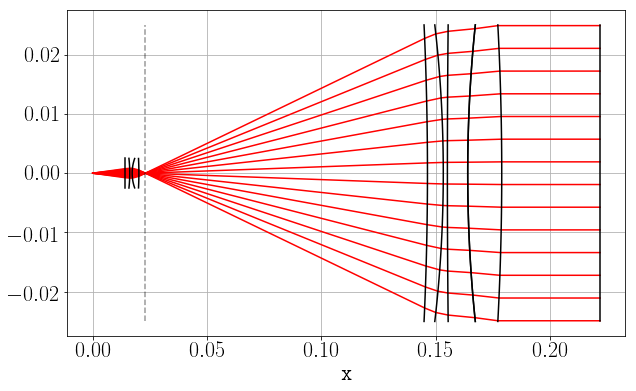

In [81]:
focus = 0.023046
ax=rayDFs[0].plot(x="x",y="y",legend=None,color='r')
for i,df in enumerate(rayDFs[1:]):
    if i < 13:
        colour = "r"
    else:
        colour = "black"
    df.plot(x="x",y="y",legend=None,ax=ax,color=colour)
ax.plot([focus,focus],[-0.025,0.025],linestyle="--",color="black",alpha=0.4)

# ax.set_ylim(-0.00001,0.00001)
# ax.set_xticklabels(list(ax.get_xticks()));
# s = ax.get_xticks()

In [6]:
tDisp = [pd.read_csv(x, names=["x","y"]) for x in glob("transverse_disp*")]
lDisp = [pd.read_csv(x, names=["x","y"]) for x in glob("longitudinal_disp*")]

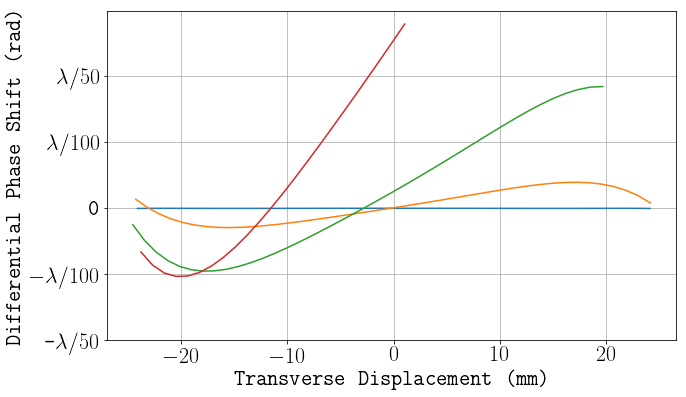

In [7]:
ax = tDisp[0].plot(x="x",y="y",legend=False)
for a in tDisp[1:]:
    a.plot(x="x",y="y",ax=ax,legend=False)
plt.xlabel("Transverse Displacement (mm)")
plt.yticks([-0.02,-0.01,0,0.01,0.02],[r"-$\lambda/50$",r"$-\lambda/100$",0,r"$\lambda/100$",r"$\lambda/50$"])
plt.ylabel("Differential Phase Shift (rad)");
plt.tight_layout()
plt.savefig("../wavefront_transverse.pdf")

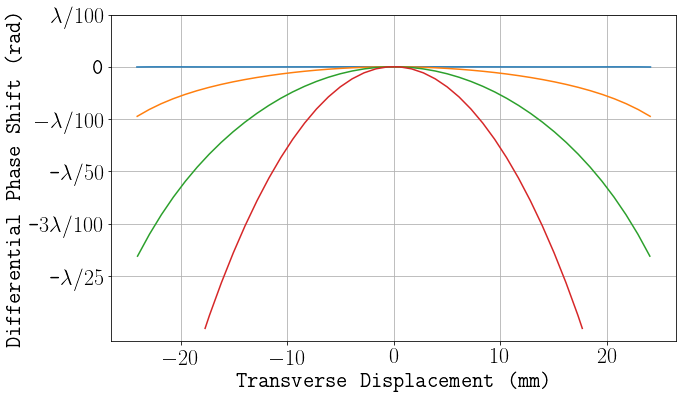

In [8]:
ax = lDisp[0].plot(x="x",y="y",legend=False)
for a in lDisp[1:]:
    a.plot(x="x",y="y",ax=ax,legend=False)
plt.xlabel("Transverse Displacement (mm)")
plt.yticks([-0.04,-0.03,-0.02,-0.01,0,0.01],[r"-$\lambda/25$",r"-$3\lambda/100$",r"-$\lambda/50$",r"$-\lambda/100$",0,r"$\lambda/100$"])
plt.ylabel("Differential Phase Shift (rad)");
plt.tight_layout()
plt.savefig("../wavefront_longitudinal.pdf")

### Collimation

### Waveplate Thickness

In [31]:
waveplate = genfromtxt("waveplate.csv", delimiter=",")

In [52]:
vals = waveplate.flatten()
m=vals[~isnan(vals)].mean()
w_avg=waveplate-m

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


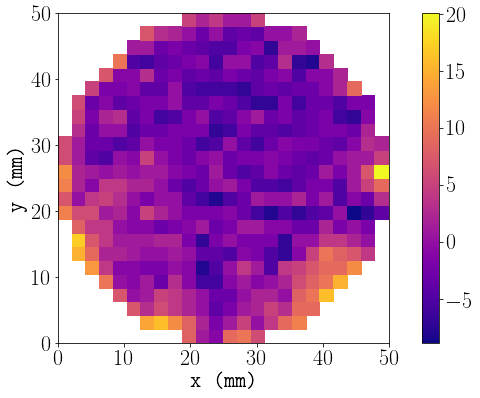

In [75]:
xrange = linspace(0,50,25)
plt.pcolormesh(xrange,xrange,w_avg,cmap="plasma")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.axes().set_aspect('equal')
plt.tight_layout()
plt.savefig("../waveplate.pdf")

In [80]:
vals[~isnan(vals)].std()* 1.4537/780

0.008615096508913622

In [81]:
max(vals[~isnan(vals)]) - min(vals[~isnan(vals)])

29.0

### Simplex Algorithm

In [6]:
fullScan = pd.read_csv("collimatorFixed.lvm",delimiter="\t",names=["NA","Horiz Volt","Vert Volt","Power"])
fullScan = fullScan.drop("NA",axis=1)
fibreExamp = pd.read_csv("fibre_alignment_example.txt",names=["Horiz Volt","Vert Volt","Power"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


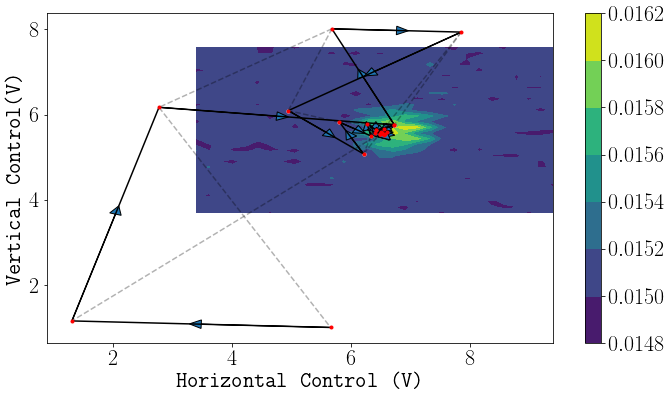

In [7]:
x=np.linspace(min(fullScan["Horiz Volt"])-0.6,max(fullScan["Horiz Volt"])-.6,30)
y=np.linspace(min(fullScan["Vert Volt"])-.3,max(fullScan["Vert Volt"])-.3,30)
z=fullScan["Power"].reshape(30,30)
contourf(x,y,z)
plt.colorbar()
scatter(fibreExamp["Horiz Volt"],fibreExamp["Vert Volt"],s=10,c=[1,1,1])
ax = plt.gca()
for i,el in fibreExamp.iterrows():
    data=(fibreExamp.loc[i:i+2].append(el))
    plot(data["Horiz Volt"][0:2], data["Vert Volt"][0:2],linestyle="-", color="black")
    plot(data["Horiz Volt"][2:],data["Vert Volt"][2:],linestyle="--", color="black", alpha=0.3)
    #ax.fill_between(data["Horiz Volt"], data["Vert Volt"],alpha=0.3)
    if i < len(fibreExamp)-1:
        plt.arrow(el["Horiz Volt"], el["Vert Volt"],(fibreExamp["Horiz Volt"].iloc[i+1]-el["Horiz Volt"])/2, (fibreExamp["Vert Volt"].iloc[i+1]-el["Vert Volt"])/2,head_width=0.2, head_length=0.2)

plot(fibreExamp["Horiz Volt"], fibreExamp["Vert Volt"], "r.")
plt.xlabel("Horizontal Control (V)")
plt.ylabel("Vertical Control(V)")

plt.tight_layout()
plt.grid()
plt.savefig("../simplex_alignment.pdf")

In [22]:
fibreExamp[fibreExamp["Power"]>0.016712]

,Horiz Volt,Vert Volt,Power
21,6.497755,5.539379,0.016717


In [47]:
fCoords=fibreExamp.tail()[["Horiz Volt", "Vert Volt"]].values
pCoords = power[power[2]>0.016162][[0,1]].values

In [48]:
fCoords-pCoords

array([[ 0.20120342, -0.16062166],
       [ 0.18853461, -0.14765123],
       [ 0.18853461, -0.14765123],
       [ 0.22422119, -0.14352032],
       [ 0.23688999, -0.15649076]])

In [36]:
power = list(reversed(list(z.flatten())))
coords=np.array([(x1,y1,power.pop()) for x1 in x for y1 in y])

power = pd.DataFrame(coords)

,0,1
435,6.296552,5.7


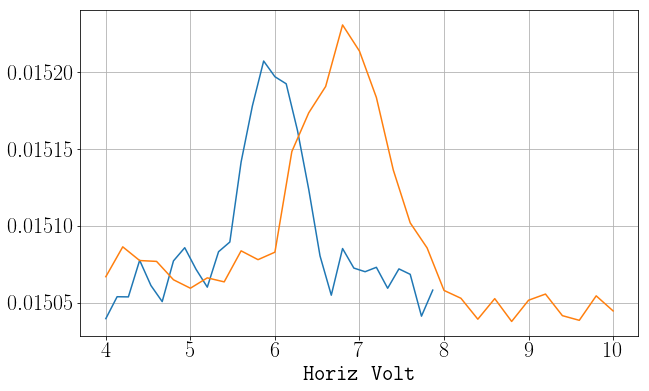

In [97]:
fullScan.groupby("Vert Volt")["Power"].mean().plot(x="Horiz Volt", y="Power")
fullScan.groupby("Horiz Volt")["Power"].mean().plot(x="Vert Volt", y="Power")

### Next Section Here

In [95]:
fullScan.groupby("Vert Volt").mean()

,Horiz Volt,Power
Vert Volt,,
4.000000,6.9,0.015040
4.133333,7.1,0.015054
4.266667,6.9,0.015054
4.400000,7.1,0.015078
4.533333,6.9,0.015061
4.666667,7.1,0.015051
4.800000,6.9,0.015077
4.933333,7.1,0.015086
5.066667,6.9,0.015072
